# Tipos de error

En estadística a veces se realizan hipótesis que pueden ser ciertas o falsas con cierto grado de confianza.

Partimos de dos hipótesis:
* Hipótesis nula, $H_0$: Es la hipótesis original, la que generalmente intentamos probar o desmentir.
* Hipótesis alternativa, $H_1$: Es la hipótesis que tenemos que aceptar cuando $H_0$ se demuestra falsa.

**Ejemplos de hipótesis:**

Sobre la altura de las personas.
* $H_0$: La media de la altura en España es 1.80m.
* $H_1$: La media de la altura en España NO es 1.80m.

Sobre el color de los perros:
* $H_0$: Todos los perros son verdes.
* $H_1$: Algún perro no es verde.

Sobre pruebas médicas:
* $H_0$: No está embarazada.
* $H_1$: Sí está embarazada.




Si nuestro test estadístico dice que la hipótesis $H_1$ es cierta pero en realidad la que es cierta es la hipótesis $H_0$ estaremos cometiendo un error.
El tipo de error depende de si nos hemos equivocado prediciendo $H_0$ o $H_1$.

|.|$H_0$ cierta|$H_1$ cierta|
|-|-|-|
|Elegimos $H_0$| No hay error |Error tipo II, falso negativo|
|Elegimos $H_1$| Error tipo I, falso positivo| No hay error |

|.|$H_0$ cierta|$H_1$ cierta|
|-|-|-|
|Elegimos $H_0$| ![](pics/homerFat.jpg) No hay error | ![](pics/MargeError.png) Error tipo II, falso negativo |
|Elegimos $H_1$| ![](pics/homerError.jpg) Error tipo I, falso positivo | ![](pics/MargePregnant.png) No hay error |




### p-valor

En los tests estadísticos trataremos de confirmar o desmentir la hipótesis nula $H_0$ mediante un valor de confianza llamado p-valor.

El p-valor es la probabilidad de que dado un modelo,la probabilidad de nuestros datos encajen en ese modelo. Es decir, es:

\\[
P(X \mid \theta)
\\]

No confundir con:

\\[
P(\theta \mid X)
\\]

Que es la probabilidad de que, dadas las muestras $X$, nuestro modelo sea $\theta$.

### Dirección de la prueba

Un test puede ser unilateral o bilateral, en función de los resultados que queramos medir:


# Comparando dos grupos de datos cuantitavos

## Medias de dos grupos

Tenemos dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Tenemos dos hipótesis:
\\[H_0 : \mu(X) = \mu(Y) \\]
\\[H_1 : \mu(X) \ne \mu(Y) \\]


In [16]:
set.seed(123)
nx<-10
ny<-15
X<-rnorm(nx,mean=7,sd=3)
Y<-rnorm(ny,mean=5,sd=3)

paste("Vector X:",paste(round(X,2),collapse=","))
paste("Vector Y:",paste(round(Y,2),collapse=","))

t_orig1<-mean(X)-mean(Y)
t_orig2<-mean(Y)-mean(X)
paste("La diferencia de medias es:",t_orig1,",",t_orig2)
mean(X)
mean(Y)

[1] "Vector X: 5.32,6.31,11.68,7.21,7.39,12.15,8.38,3.2,4.94,5.66"

[1] "Vector Y: 8.67,6.08,6.2,5.33,3.33,10.36,6.49,-0.9,7.1,3.58,1.8,4.35,1.92,2.81,3.12"

[1] "La diferencia de medias es: 2.53977972380597 , -2.53977972380597"

[1] 7.223877

[1] 4.684097

¿Cual es la probabilidad de que recombinando los valores de las variables X e Y la diferencia de las medias sea superior a la original?

In [7]:
perm_func <- function(x1, x2){
    x<-c(x1,x2)
    n<-length(x)
    
    idx1<-sample(1:n,length(x1))
    idx2<-setdiff(1:n,idx1)
    list(x1=x[idx1],x2=x[idx2])
}

In [14]:
perm<-perm_func(X,Y)
mean(perm$x1)-mean(perm$x2)

[1] 0.7781576

In [15]:
mn<-c()
num_out_X1_larger_X2<-0
num_out_X2_larger_X1<-0
total_trials<-10000
for (i in 1:total_trials){
    plist<-perm_func(X,Y)
    x1<-plist$x1
    x2<-plist$x2
    
    t<-mean(x1)-mean(x2)
    mn<-c(mn,t)
    
    if (t>t_orig1){
        num_out_X1_larger_X2<-num_out_X1_larger_X2+1
    }
    if (t< t_orig2){
        num_out_X2_larger_X1<-num_out_X2_larger_X1+1
    }
}
paste("La probabilidad por puro azar la media de X menos Y sea mayor:",num_out_X1_larger_X2/total_trials)
paste("La probabilidad por puro azar la media de Y menos X sea mayor:",num_out_X2_larger_X1/total_trials)
paste("La probabilidad de que la media de X sea diferente de la media de Y:",(num_out_X2_larger_X1+num_out_X1_larger_X2)/total_trials)

[1] "La probabilidad por puro azar la media de X menos Y sea mayor: 0.0202"

[1] "La probabilidad por puro azar la media de Y menos X sea mayor: 0.022"

[1] "La probabilidad de que la media de X sea diferente de la media de Y: 0.0422"

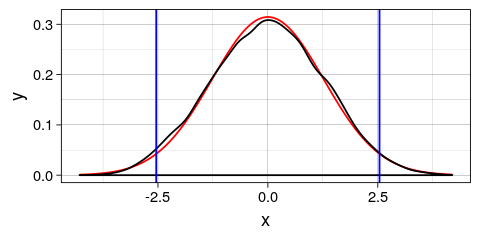

In [17]:
options(repr.plot.height=2,repr.plot.width=4)
library(ggplot2)
ggplot(data.frame(x=mn),aes(x=x))+
    stat_function(fun=dnorm,args = list(mean=0,sd=sd(mn)),color="red")+
    geom_density()+geom_vline(xintercept = t_orig1,color="blue")+
    geom_vline(xintercept = t_orig2,color="blue")+
  theme_linedraw()

## T-test de student

El t-test es usado cuando tienes dos grupos de datos y quieres saber si la media de ambos grupos es igual o no. Tenemos dos hipótesis:
\\[H_0 : \mu(X) = \mu(Y) \\]
\\[H_1 : \mu(X) \ne \mu(Y) \\]

Empezamos con las siguientes suposiciones:
1. Las muestras han sido seleccionas por muestreo aleatorio simple dentro de la población.
2. Las poblaciones siguen una distribución normal. (sino usar test Wilcoxon-Mann-Whitney)
3. Ambas poblaciones tienen la misma varianza. (sino usar test Welch)
4. Las poblaciones no están correladas. (sino usar t-test emparejado)

Primero calculamos la media y varianza de ambos grupos. El test para verificar si la hipótesis nula $H_0$ es cierta puede ser calculado como sigue:

\\[ t=\frac{E[X]-E[Y]}{s_p·\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}} \\]

Donde $s_p$ es la desviación estandar compuesta, calculada como:

\\[ s^2_p=\frac{(n_x-1)Var[X]+(n_y-1)Var[Y]}{n_x+n_y-2} \\]

Donde $n_x$ y $n_y$ son los números de muestras en cada uno de los grupos muestreados. El número de grados de libertad es 
$d.f.=n_x+n_y-2$. Podemos asumir que las dos varianzas son iguales si ambas pasan el test de varianza de Fisher(F-test).


In [18]:
sp<-sqrt(((nx-1)*var(X)+(ny-1)*var(Y))/(nx+ny-2))
t_orig<-(mean(X)-mean(Y))/(sp*sqrt(1/nx+1/ny))

paste("El estimador t-estadístico es:",t_orig)

[1] "El estimador t-estadístico es: 2.15402713380947"

In [19]:
mn<-c()
num_out_X1_larger_X2<-0
num_out_X2_larger_X1<-0
total_trials<-10000
for (i in 1:total_trials){
    plist<-perm_func(X,Y)
    x1<-plist$x1
    x2<-plist$x2
            
    sp<-sqrt(((nx-1)*var(x1)+(ny-1)*var(x2))/(nx+ny-2))
    
    t<-(mean(x1)-mean(x2))/(sp*sqrt(1/nx+1/ny))
    mn<-c(mn,t)
    
    if (t>t_orig){
        num_out_X1_larger_X2<-num_out_X1_larger_X2+1
    }
    if (t< -1*t_orig){
        num_out_X2_larger_X1<-num_out_X2_larger_X1+1
    }
}
paste("La probabilidad de que la media de X sea mayor que la media de Y es:",num_out_X1_larger_X2/total_trials)
paste("La probabilidad de que la media de Y sea mayor que la media de X es:",num_out_X2_larger_X1/total_trials)
paste("La probabilidad de que la media de X sea diferente de la media de Y:",(num_out_X2_larger_X1+num_out_X1_larger_X2)/total_trials)

[1] "La probabilidad de que la media de X sea mayor que la media de Y es: 0.0202"

[1] "La probabilidad de que la media de Y sea mayor que la media de X es: 0.0221"

[1] "La probabilidad de que la media de X sea diferente de la media de Y: 0.0423"

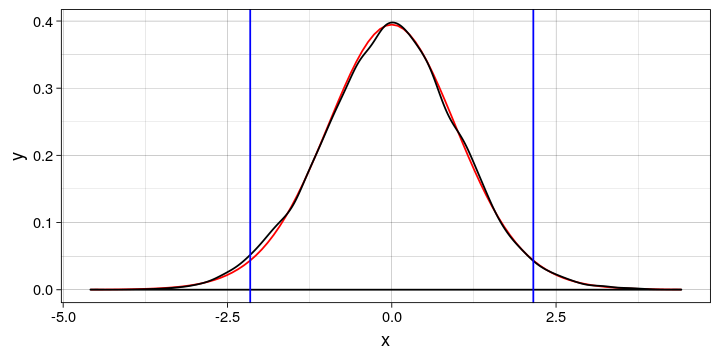

In [20]:
options(repr.plot.height=3,repr.plot.width=6)
library(ggplot2)
ggplot(data.frame(x=mn),aes(x=x))+stat_function(fun=dt,args = list(df = nx+ny-2),color="red")+
    geom_density()+geom_vline(xintercept = t_orig,color="blue")+
    geom_vline(xintercept = -1*t_orig,color="blue")+
  theme_linedraw()

Como vemos, estas la **diferencia de las medias normalizada** de estas variables siguen perfectamente una distribución t-student.

[1] "El margen que nos interesa está en el rango: [ -2.09 , 2.09 ]"

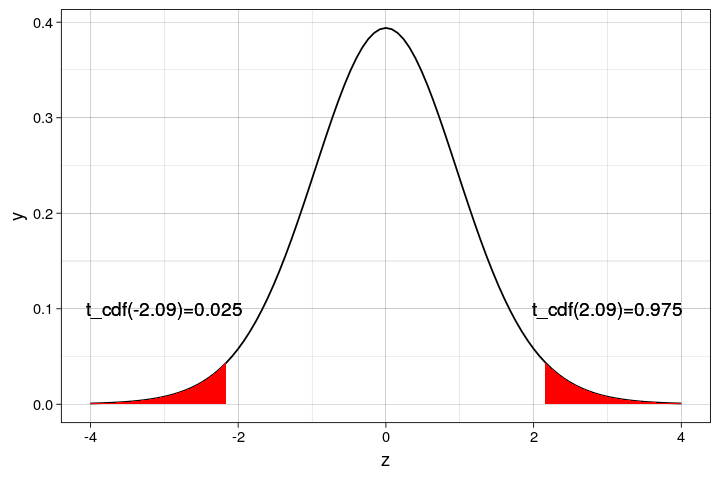

In [21]:
library(ggplot2)
d.f.<-20

loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)

paste("El margen que nos interesa está en el rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  & x<upth  ]<-NA
    out
}
options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red")+
  geom_text(x=3,y=0.1,size=4,label=paste0("t_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("t_cdf(",round(loth,2),")=0.025"))+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

### Funciones en R

Supongamos que tenemos dos variables aleatorias X, con 10 muestras, e Y, con 15 muestas. Queremos saber si ambas proceden de la misma población. Una forma de saberlo es calcular la media de X e Y.
A continuación calcular el test t-student y ver el p-valor. 

* Un valor muy **bajo**, por ejemplo inferior a 0.05, nos llevaría a rechazar la hipótesis nula $H_0$ y afirmar que las medias son tan diferentes que probablemente vendrán de poblaciones distintas.
* Un p-valor **alto** nos indicaría que la hipótesis $H_0$ es posible que sea cierta.



#### Test bilateral

In [22]:
set.seed(123)
nx<-10
ny<-15
X<-rnorm(nx,mean=7,sd=3)
mean(X)
Y<-rnorm(ny,mean=5,sd=3)
mean(Y)

sp<-sqrt(((nx-1)*var(X)+(ny-1)*var(Y))/(nx+ny-2))
t<-(mean(X)-mean(Y))/(sp*sqrt(1/nx+1/ny))
t
pvalue<-(1-pt(abs(t),nx+ny-2))*2

print(paste("El pvalor es",pvalue))


[1] 7.223877

[1] 4.684097

[1] 2.154027

[1] "El pvalor es 0.0419527692505857"


Si el p-valor es bajo (menor de 0.05) significa que es bastante improbable que las medias de X e Y sean iguales. Por lo tanto en ese caso podríamos rechazar la hipótesis nula $H_0$. 

El mismo procedimiento lo podemos ejecutar usando la función *t.test*:

In [23]:
t.test(X,Y,var.equal = TRUE)


	Two Sample t-test

data:  X and Y
t = 2.154, df = 23, p-value = 0.04195
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1006579 4.9789016
sample estimates:
mean of x mean of y 
 7.223877  4.684097 


[1] "El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [ -2.1 , 2.1 ]"

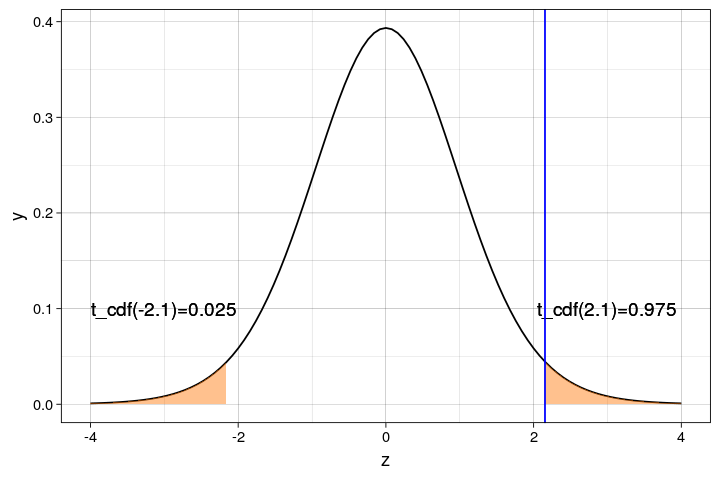

In [24]:
d.f.<-nx+nx-2

loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)

paste("El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  & x<upth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[x> -abs(t)  & x< abs(t)  ]<-NA
    out
}


options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.2)+
  geom_text(x=3,y=0.1,size=4,label=paste0("t_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("t_cdf(",round(loth,2),")=0.025"))+

  geom_vline(xintercept = t,color="blue")+

  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

El p.valor es la integral de las dos áreas amarillas. Para rechazar la hipótesis nula el área debería ser la de las zona roja.

#### Test unilateral (izquierda)

\\[H_0 : \mu(X) >= \mu(Y) \\]
\\[H_1 : \mu(X) < \mu(Y) \\]


In [25]:
t.test(X,Y,var.equal = TRUE, alternative = "less")


	Two Sample t-test

data:  X and Y
t = 2.154, df = 23, p-value = 0.979
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 4.560579
sample estimates:
mean of x mean of y 
 7.223877  4.684097 


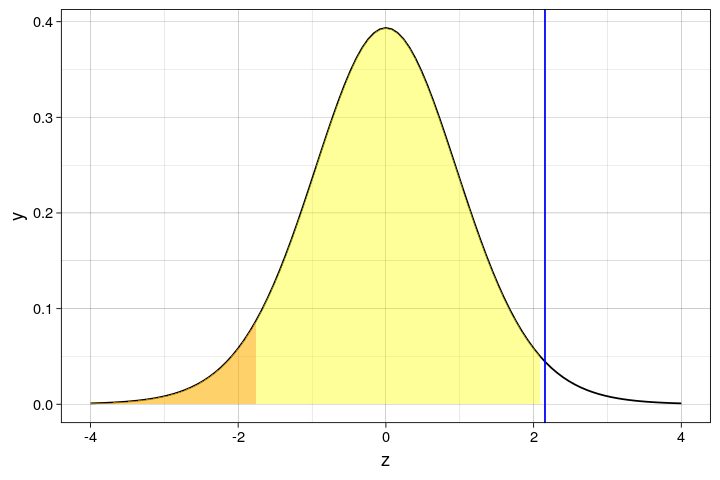

In [26]:
loth<-qt(0.05,d.f.,lower.tail = T)

qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[ x> t  ]<-NA
    out
}
options(repr.plot.height=4,repr.plot.width=6)
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.4)+
  geom_vline(xintercept = t,color="blue")+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

#### Test unilateral (derecha)

\\[H_0 : \mu(X) <= \mu(Y) \\]
\\[H_1 : \mu(X) > \mu(Y) \\]


In [27]:
t.test(X,Y,var.equal = TRUE, alternative = "greater")


	Two Sample t-test

data:  X and Y
t = 2.154, df = 23, p-value = 0.02098
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.5189806       Inf
sample estimates:
mean of x mean of y 
 7.223877  4.684097 


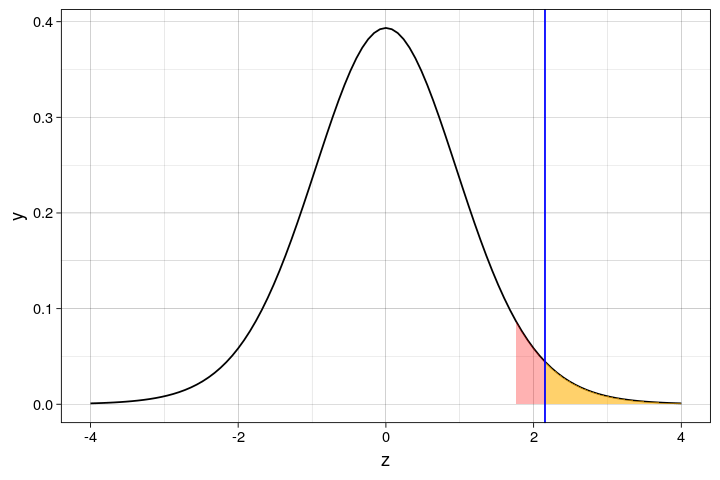

In [28]:
upth<-qt(0.05,d.f.,lower.tail = F)

qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[ x<upth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[ x< t  ]<-NA
    out
}
options(repr.plot.height=4,repr.plot.width=6)
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.4)+
  geom_vline(xintercept = t,color="blue")+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

## t-test de Welch

Este test es usado cuando asumimos que las dos poblaciones no tienen porqué tener la misma varianza. El test estdístico es calculado así:
\\[ t=\frac{E[X]-E[Y]}{s_{\bar{\Delta}}} \\]

donde
\\[ s_{\bar{\Delta}}=\sqrt{\frac{Var[X]}{n_x}+\frac{Var[Y]}{n_y}} \\]

Y el número de grados de libertad es:
\\[ d.f.= \frac{\left(\frac{Var[X]}{n_x}+\frac{Var[Y]}{n_y} \right)^2}{\frac{\left( \frac{Var[X]}{n_x} \right)^2}{n_x-1} + \frac{\left( \frac{Var[Y]}{n_y} \right)^2}{n_y-1}} \\]

igualmente lo calculamos sobre una t-student. Lo único que cambia es la forma de calcular los grados de libertad y la varianza.

### Funciones en R

Supongamos que al igual que en el caso anterior tenemos dos variables aleatorias X, con 10 muestras, e Y, con 15 muestas. Queremos saber si ambas proceden de la misma población. Una forma de saberlo es calcular la media de X e Y sin asumir que ambos grupos tienen la misma varianza. A continuación calcular el test t-student y ver el p-valor.



In [29]:
set.seed(123)
X<-rnorm(nx,mean=7,sd=3)
Y<-rnorm(ny,mean=10,sd=0.1)

sd<-sqrt(var(X)/nx+var(Y)/ny)
t<-(mean(X)-mean(Y))/(sd)
df<-(var(X)/nx+var(Y)/ny)^2/((var(X)/nx)^2/(nx-1)+(var(Y)/ny)^2/(ny-1))
pvalue<-pt(t,df)*2

print(paste("El pvalor es",pvalue))

[1] "El pvalor es 0.0136516316049945"


Esto se puede hacer en R con el comando *t.test*:

In [30]:
t.test(X,Y,var.equal = FALSE)


	Welch Two Sample t-test

data:  X and Y
t = -3.0553, df = 9.0137, p-value = 0.01365
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.8127864 -0.7183995
sample estimates:
mean of x mean of y 
 7.223877  9.989470 


En este caso esl p-valor es realmente bajo, así que podemos rechazar la hipótesis nula y asumir que ambas medias no son iguales.


![Imagen no cargada. Edita y borra la @ . Fuente: Pawn Stars]( pics/pvalor.jpg )

### Ejemplo: Peso de los niños al nacer

Este dataset contien información de bebes recien nacidos y sus padres. Nos vamos a centrar en si la madre era o no fumadora.

In [31]:
bwt<-read.csv("data/birthweight_reduced.csv")
bwt$smoker<-factor(bwt$smoker,labels = c("NO","YES"))

**Test bilateral**. Hipótesis:

\\[H_0 : \mu(X) = \mu(Y) \\]
\\[H_1 : \mu(X) \ne \mu(Y) \\]

* $H_0$ : El peso medio de los niños al nacer es igual en las madres fumadoras y no fumadoras.
* $H_1$ : El peso medio de los niños al nacer es diferente (mayor o menor) en las madres fumadoras y no fumadoras.

El pvalor es menor de 0.05, podemos tener indicios para rechazar la hipótesis nula y asumir que el peso de los niños al nacer va a ser diferente si las madres fuman o no.

AVISO: No sabemos si los niños de las madres fumadores pesan más o menos, solo que pesan **distinto**.

In [32]:
head(bwt)

id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
<int>,<int>,<int>,<dbl>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1313,12,17,5.8,33,NO,24,0,58,99,26,16,0,66,1,0,Low
431,12,19,4.2,33,YES,20,7,63,109,20,10,35,71,1,0,Low
808,13,19,6.4,34,NO,26,0,65,140,25,12,25,69,0,0,Normal
300,12,18,4.5,35,YES,41,7,65,125,37,14,25,68,1,1,Low
516,13,18,5.8,35,YES,20,35,67,125,23,12,50,73,1,0,Low
321,13,19,6.8,37,NO,28,0,62,118,39,10,0,67,0,0,Normal


In [33]:
# Ejecutar t.test
tw<-t.test(bwt$Birthweight[bwt$smoker=="YES"],bwt$Birthweight[bwt$smoker=="NO"])
tw


	Welch Two Sample t-test

data:  bwt$Birthweight[bwt$smoker == "YES"] and bwt$Birthweight[bwt$smoker == "NO"]
t = -2.0735, df = 39.662, p-value = 0.04467
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.60512583 -0.02032871
sample estimates:
mean of x mean of y 
 6.877273  7.690000 


In [34]:
loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)
upth
loth

[1] 2.100922

[1] -2.100922

[1] "El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [ -2.02 , 2.02 ]"

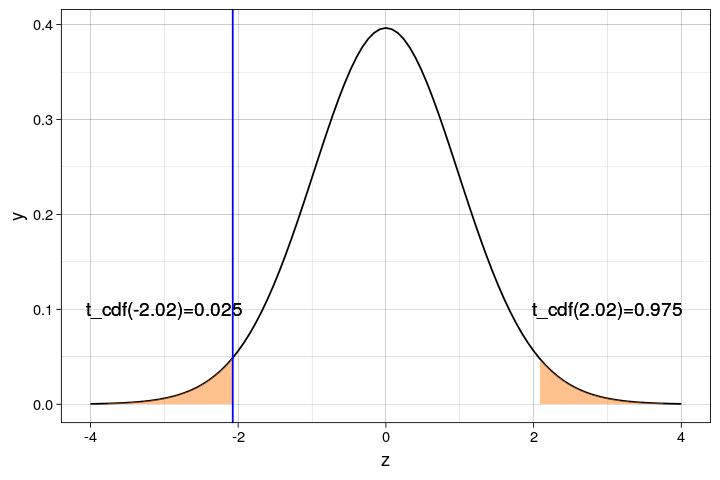

In [35]:
library(ggplot2)
d.f.<-tw$parameter
t<-tw$statistic
loth<-qt(0.025,d.f.,lower.tail = T)
upth<-qt(0.025,d.f.,lower.tail = F)

paste("El margen que nos llevaría a rechazar la hipótesis nula está fuera del rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  & x<upth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[x> -abs(t)  & x< abs(t)  ]<-NA
    out
}


options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.2)+
  geom_text(x=3,y=0.1,size=4,label=paste0("t_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("t_cdf(",round(loth,2),")=0.025"))+

  geom_vline(xintercept = t,color="blue")+

  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

**Test unilateral** (izquierdo). Hipótesis:

\\[H_0 : \mu(X) >= \mu(Y) \\]
\\[H_1 : \mu(X) < \mu(Y) \\]

* $H_0$ : El peso medio de los niños al nacer es **mayor o igual** en las madres fumadoras que en las **no** fumadoras.
* $H_1$ : El peso medio de los niños al nacer es **menor** en las madres fumadoras que en las **no** fumadoras.

In [36]:
tw<-t.test(bwt$Birthweight[bwt$smoker=="YES"],bwt$Birthweight[bwt$smoker=="NO"],alternative = "less")
tw


	Welch Two Sample t-test

data:  bwt$Birthweight[bwt$smoker == "YES"] and bwt$Birthweight[bwt$smoker == "NO"]
t = -2.0735, df = 39.662, p-value = 0.02233
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.1525855
sample estimates:
mean of x mean of y 
 6.877273  7.690000 


El pvalor es menor de 0.05, podemos tener indicios para rechazar la hipótesis nula y asumir que el peso de los **niños de las madres fumadoras pesan menos**.

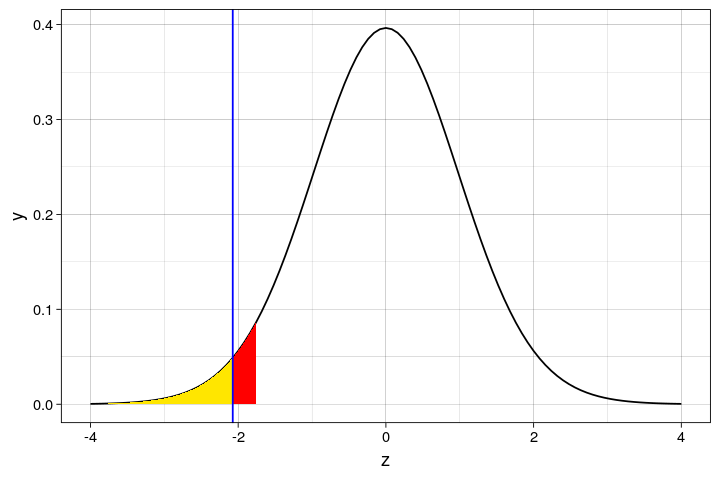

In [37]:
loth<-qt(0.05,d.f.,lower.tail = T)

qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[x> loth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[ x> t  ]<-NA
    out
}
options(repr.plot.height=4,repr.plot.width=6)
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=1)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.9)+
  geom_vline(xintercept = t,color="blue")+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

**Test unilateral** (derecho). Hipótesis:

\\[H_0 : \mu(X) <= \mu(Y) \\]
\\[H_1 : \mu(X) > \mu(Y) \\]

* $H_0$ : El peso medio de los niños al nacer es **menor o igual** en las madres fumadoras que en las **no** fumadoras.
* $H_1$ : El peso medio de los niños al nacer es **mayor** en las madres fumadoras que en las **no** fumadoras.

In [38]:
# Ejecutar t.test
tw<-t.test(bwt$Birthweight[bwt$smoker=="YES"],bwt$Birthweight[bwt$smoker=="NO"],alternative = "greater")
tw


	Welch Two Sample t-test

data:  bwt$Birthweight[bwt$smoker == "YES"] and bwt$Birthweight[bwt$smoker == "NO"]
t = -2.0735, df = 39.662, p-value = 0.9777
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.472869       Inf
sample estimates:
mean of x mean of y 
 6.877273  7.690000 


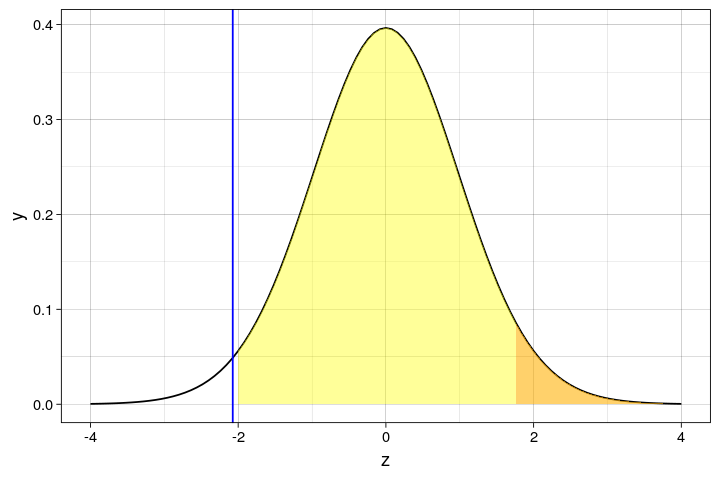

In [39]:
upth<-qt(0.05,d.f.,lower.tail = F)

qsd009<-function(x){    
    out<-dt(x,d.f.)
    out[ x<upth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dt(x,d.f.)
    out[ x< t  ]<-NA
    out
}
options(repr.plot.height=4,repr.plot.width=6)
ggplot(xdf,aes(x=z))+stat_function(fun=dt,args = list(df = d.f.))+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=0.3)+
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.4)+
  geom_vline(xintercept = t,color="blue")+
  theme_linedraw()

En este caso no podemos rechazar la hipótesis nula. El tabaco puede afectar o no al bebé, pero lo que parece más probable es que un bebé de madre fumadora no va a pesar más.

## T-test emparejado

Este test es usado cuando hay **dos grupos** de datos los cuales están **correlados** y quieres saber si la media de ambos grupos es la misma o no. Esto puede ser usado por ejemplo para comprobar un estudio médico y queremos comprobar si los valores han cambiado antes y después del tratamiento. La hipóteis nula dice que la diferencia entre las dos medias es igual a $\mu_0$
\\[H_0 : \mu(X) - \mu(Y) = \mu_0 \\]
\\[H_1 : \mu(X) -\mu(Y) \ne \mu_0 \\]
El test estadístico es calculado de la media y varianza de la diferencia de las dos muestras:
\\[ t=\frac{E[X-Y]-\mu_0}{\sqrt{var[X-Y]/n}}\\]

### Funciones en R



En el siguiente ejemplo queremos comprobar si la diferencia en media entre las dos variables aleatorias X e Y es $\mu_0=3$.

In [40]:
n<-20
X<-rnorm(n,mean=5,sd=4)
Y<-X-rnorm(n,mean=3,sd=2)
mu0<-3

D<-X-Y
t<-(mean(D)-mu0)/(sqrt(var(D)/n))
pvalor<-pt(t,n-1)*2
print(paste("El pvalor es",pvalor))

[1] "El pvalor es 0.651409375386783"


O con la función *t.test*

In [41]:
t.test(X,Y,mu=mu0,paired = TRUE)


	Paired t-test

data:  X and Y
t = -0.45905, df = 19, p-value = 0.6514
alternative hypothesis: true difference in means is not equal to 3
95 percent confidence interval:
 2.096329 3.578581
sample estimates:
mean of the differences 
               2.837455 


### Ejemplo: Colesterol

Un estudio probó si el colesterol se redujo después de usar una cierta marca de margarina como parte de una dieta baja en grasas y baja en colesterol. Los sujetos consumieron en promedio 2,31g del ingrediente activo, stanol eastern, un día. Este conjunto de datos contiene información sobre 18 personas que usan margarina para reducir el colesterol en tres puntos de tiempo.
Fuente: [www.statstutor.ac.uk](http://www.statstutor.ac.uk)

In [43]:
chl<-read.csv("data/stcp-dataset-cholesterol_des.csv")

head(chl)

print("Para la margarina tipo A")
t.test(chl$Before[chl$Margarine=="A"],chl$After4weeks[chl$Margarine=="A"],paired=TRUE)

print("Para la margarina tipo B")
t.test(chl$Before[chl$Margarine=="B"],chl$After4weeks[chl$Margarine=="B"],paired=TRUE)

ID,Before,After4weeks,After8weeks,Margarine
<int>,<dbl>,<dbl>,<dbl>,<fct>
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,A
3,6.56,5.83,5.71,B
4,4.80,4.27,4.15,A
5,8.43,7.71,7.67,B
6,7.49,7.12,7.05,A


[1] "Para la margarina tipo A"



	Paired t-test

data:  chl$Before[chl$Margarine == "A"] and chl$After4weeks[chl$Margarine == "A"]
t = 11.098, df = 8, p-value = 3.88e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3846643 0.5864468
sample estimates:
mean of the differences 
              0.4855556 


[1] "Para la margarina tipo B"



	Paired t-test

data:  chl$Before[chl$Margarine == "B"] and chl$After4weeks[chl$Margarine == "B"]
t = 13.857, df = 8, p-value = 7.112e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5390531 0.7542802
sample estimates:
mean of the differences 
              0.6466667 


En ambos casos el p-valor es bastante bajo, así que parece que los sujetos realmente bajaron su nivel de colesterol, muy posiblemente a causa de la margarina.

## Wilcoxon-Mann-Whitney test

El U-test Mann-Whitney es usado para **comparar si dos variables independientes vienen de la misma distribución**. Funciona bajo las siguientes suposiciones:
* Todas las observaciones de ambos grupos son independientes entre sí,
* Las respuestas son ordinales (es decir, se puede decir al menos, de dos observaciones, caul es la mayor)
* Bajo la hipótesis nula $H_0$, la probabilidad de que una observación de la población X supere una observación de la segunda población Y es igual a la probabilidad de que una observación de Y exceda una observación de X. 
* La hipótesis alternativa $H_1$ es la probabilidad de que una observación de la población X que excede una observación de la segunda población Y sea diferente de la probabilidad de que una observación de Y exceda una observación de X. La alternativa también puede establecerse en términos de una sola prueba a los lados, por ejemplo: P (X> Y)> P (Y> X).

Las hipótesis son:
\\[
\begin{split}
H_0 : P(X > Y) = P(Y > X) \\
H_1 :P(X > Y) \ne P(Y > X)
\end{split}
\\]


### Funciones en R

Esto puede ser calculado en R con la función $wilcox.test$. Vamos a comparar si existe o no diferencia en las millas por galón que puede recorrer cuando un coche tiene marchas manuales o automáticas.

In [44]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [45]:
mtcars$mpg

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

In [46]:
mtcars$am<-as.factor(mtcars$am) 
mtcars$am

[1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1
Levels: 0 1

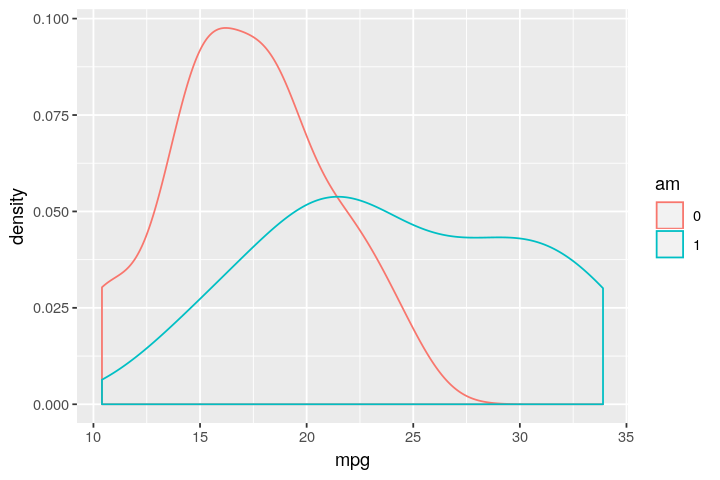

In [48]:
options(repr.plot.height=4,repr.plot.width=6)

ggplot(data=mtcars, aes(x=mpg, color=am))+geom_density()

In [47]:
wilcox.test(mpg~am, data=mtcars)

Warning message in wilcox.test.default(x = c(21.4, 18.7, 18.1, 14.3, 24.4, 22.8, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  mpg by am
W = 42, p-value = 0.001871
alternative hypothesis: true location shift is not equal to 0


Podemos asumir que el consumo de gasolina de un coche (mtcars\$mpg, miles per gallon), es dependiente de si el coche es o no automático (mtcars\$am) porque el valor tan bajo del p-valor nos obliga a rechazar la hipótesis nula.
La hipótesis nula es que ambas distribuciones son iguales.

## Test de varianza Fisher

El test F es usado cuando se tienen **dos** grupos de datos procedentes de una distribución **normal** y se quiere saber si la **varianza** de ambos grupos es la misma. Esto significa que las variables son homocedasticas. La hipótesis con la que trabaja este test es :
\\[H_0 : \sigma(X) = \sigma(Y) \\]
\\[H_1 : \sigma(X) \ne \sigma(Y) \\]

El test estadítico se basa en el cociente de dos varianzas:
\\[F=\frac{Var[X]}{Var[Y]}\\]

Esto sigue una distribución F con $n_x-1$ y $n_y-1$ grados de libertad.

In [49]:
nx<-10
ny<-15
X<-rnorm(nx,mean=7,sd=3)
Y<-rnorm(ny,mean=10,sd=3)
var.test(X,Y)


	F test to compare two variances

data:  X and Y
F = 3.4123, num df = 9, denom df = 14, p-value = 0.03946
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.063265 12.959890
sample estimates:
ratio of variances 
          3.412336 


### Test de Bartlett

El test F es usado cuando se tienen **varios** grupos de datos procedentes de una distribución **cualquiera** y se quiere saber si la **varianza** de ambos grupos es la misma. Esto significa que las variables son homocedasticas. La hipótesis con la que trabaja este test es :
\\[H_0 : \sigma(X) = \sigma(Y) \\]
\\[H_1 : \sigma(X) \ne \sigma(Y) \\]


In [50]:
n<- 20
df<-data.frame(X=runif(n,min=-1,max=2),group="A")
df<-rbind(df,data.frame(X=runif(n,min=0,max=1),group="B"))

#head(df)

bartlett.test(X~group, data=df)


	Bartlett test of homogeneity of variances

data:  X by group
Bartlett's K-squared = 16.973, df = 1, p-value = 3.791e-05


## Comparando normalidad (Shapiro)

El Test de Shapiro–Wilk se usa para comprobar la normalidad de un conjunto de datos. 
Se plantea como hipótesis nula que una muestra X proviene de una población normalmente distribuida. Se considera como unos de los tests más fiables.

En R se ejecuta llamando a shapiro.test()

In [51]:
shapiro.test(rnorm(100,mean=10,sd=4))


	Shapiro-Wilk normality test

data:  rnorm(100, mean = 10, sd = 4)
W = 0.97321, p-value = 0.03909


In [52]:
# EJemplo shaprito uniforme
shapiro.test(runif(100,min= -10, max=10))


	Shapiro-Wilk normality test

data:  runif(100, min = -10, max = 10)
W = 0.94841, p-value = 0.0006532


Si el p-valor es muy bajo deberíamos rechazar la hipótesis nula. Es decir, la distribución no es normal.

### Ejemplo: Peso de niños al nacer

In [53]:
library(ggplot2)
bwt<-read.csv("data/birthweight_reduced.csv")
bwt$smoker<-factor(bwt$smoker,labels = c("NO","YES"))

paste("Las muestras de peso para madres fumadoras parecen seguir una gaussiana. pvalor:",
          shapiro.test(bwt$Birthweight[bwt$smoker=="YES"])$p.value)
paste("Las muestras de peso para madres NO fumadoras parecen seguir una gaussiana. pvalor:",
          shapiro.test(bwt$Birthweight[bwt$smoker=="NO"])$p.value)


tw<-t.test(bwt$Birthweight[bwt$smoker=="YES"],bwt$Birthweight[bwt$smoker=="NO"])
print("Podemos aplicar un t-welch's test")
tw
print("Parece que podría haber una diferencia estadística significativa en el peso del bebé si la madre fuma o no.")


[1] "Las muestras de peso para madres fumadoras parecen seguir una gaussiana. pvalor: 0.955512608511625"

[1] "Las muestras de peso para madres NO fumadoras parecen seguir una gaussiana. pvalor: 0.727691701451127"

[1] "Podemos aplicar un t-welch's test"



	Welch Two Sample t-test

data:  bwt$Birthweight[bwt$smoker == "YES"] and bwt$Birthweight[bwt$smoker == "NO"]
t = -2.0735, df = 39.662, p-value = 0.04467
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.60512583 -0.02032871
sample estimates:
mean of x mean of y 
 6.877273  7.690000 


[1] "Parece que podría haber una diferencia estadística significativa en el peso del bebé si la madre fuma o no."


# Comparando distintos grupos de datos

## ANOVA 1 variable

Usamos ANOVA para comparar las medias de tres o más grupos de datos. Es decir, compara una variable dependiente (los datos de entrada) con una variable independiente  que tiene tres o más niveles (uno por cada grupo). Cada nivel identifica cada uno de los grupos de datos. La hipótesis nula afirma qeu todos los grupos tienen la misma media:
\\[
\begin{split}
H_0 : \mu_1 = \mu_2 = ... = \mu_k \\
H_1 : \text{at leas one pair }\mu_j\ne \mu_i 
\end{split}
\\]
Estas hipótesis examinan si las muestras siguen la siguiente regresión lineal: $y_{ij}=\mu_j+\varepsilon_{ij}$, donde:
* $y_{ij}$ es la variable dependiente, muestra i-ésima del grupo j.
* $\mu_j$ es la media real de grupo j, de la población total (desconocida pero estimable)
* $\varepsilon_{ij}$ son los errores resultantes del modelo
* $\bar{y}_j$ es la media muestral del grupo j
* $k$ es el número de grupos
* $n_j$ es el número de muestras del grupo j
* $n=\sum_{j=1}^{k}n_j$ es el número total de muestras

El test-F omnibus test en anova de una variable es:
\\[
F=\frac{\sum_{j=1}^{k} n_j \left ( \bar{y_j}-\bar{y} \right )^2 / \left ( k-1 \right ) }{\sum_{j=1}^{k} \sum_{i=1}^{n_j} \left ( y_{ij}-\bar{y_j} \right )^2 / \left ( n-k \right ) }=\frac{\text{Suma cuadrádica de residuos de cada grupo}}{\text{Suma cuadrádica de residuos dentro de un grupo}}
\\]



ANOVA produce un test estadístico F, la relación de la varianza calculada entre los medios a la varianza dentro de las muestras. **Si los miembros del grupo provienen de poblaciones con los mismos valores medios, la varianza entre las medias del grupo debe ser menor que la varianza de las muestras**, siguiendo el teorema del límite central. Por lo tanto, una relación más alta implica que las muestras se tomaron de poblaciones con diferentes valores medios.

Cuando solo hay dos medias para comparar la prueba t de Student (se debe usar la prueba t de Student), la prueba t y la prueba F son equivalentes; la relación entre ANOVA y t viene dada por $F = t^2$.



Suposiciones de ANOVA:
* La variable dependiente está distribuida sigue una distribución normal en cada grupo.
* Hay homogeneidad de varianzas.
* Las observaciones son independientes.


### Funciones en R

In [57]:
set.seed(123)
n1<-10; n2<-50; n3<-40
m1<-18; m2<-15; m3<-15
sd<-7

a1<-rnorm(n1,mean=m1,sd=sd)
a2<-rnorm(n2,mean=m2,sd=sd)
a3<-rnorm(n3,mean=m3,sd=sd)

ma1<-mean(a1)
ma2<-mean(a2)
ma3<-mean(a3)
ma<-mean(c(a1,a2,a3))
masq_between_group<-n1*(ma1-ma)^2+n2*(ma2-ma)^2+n3*(ma3-ma)^2
df_between_group<-3-1
mean_square_value_between_group<-masq_between_group/df_between_group

masq_within_group<-sum((a1-ma1)^2)+sum((a2-ma2)^2)+sum((a3-ma3)^2)
df_within_group<-n1-1+n2-1+n3-1
mean_square_value_within_group<-masq_within_group/df_within_group

F<-mean_square_value_between_group/mean_square_value_within_group
F

pvalue<-1-pf(F,df_between_group,df_within_group)
print(paste("El pvalor es",pvalue))

[1] 0.9482265

[1] "El pvalor es 0.390988887511404"


El p-valor es realmente bajo, por lo que podemos rechazar la hipótesis nula. Esto significa que no todos los grupos tienen la misma media. Se puede calcular con la función *aov*.

In [58]:
df <- rbind(data.frame(value=a1,cl="1"),data.frame(value=a2,cl="2"),data.frame(value=a3,cl="3"))
head(df)
str(df)

value,cl
<dbl>,<fct>
14.07667,1
16.38876,1
28.91096,1
18.49356,1
18.90501,1
30.00545,1


'data.frame':	100 obs. of  2 variables:
 $ value: num  14.1 16.4 28.9 18.5 18.9 ...
 $ cl   : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


In [59]:
summary(aov( value ~ cl, data=df))

            Df Sum Sq Mean Sq F value Pr(>F)
cl           2     79   39.47   0.948  0.391
Residuals   97   4037   41.62               

O equivalentemente con la función *oneway.test* con el parámetro *var.equal=T*

In [60]:
oneway.test( value ~ cl, data=df,var.equal = T)


	One-way analysis of means

data:  value and cl
F = 0.94823, num df = 2, denom df = 97, p-value = 0.391


#### Diferente varianza

Cuando los grupos no presentan la misma varianza, en lugar del test F se puede utilizar el test de Welch. Esto lo hace R con la función *oneway.test*

In [61]:
oneway.test( value ~ cl, data=df)


	One-way analysis of means (not assuming equal variances)

data:  value and cl
F = 0.87437, num df = 2.000, denom df = 25.257, p-value = 0.4294


#### Diferentes distribuciones


El test de Kruskal-Wallis se utiliza cuando en ANOVA no cumplimos la normalidad de los datos, cuando las muestras no vienen de una distribución gausiana.

En R se utiliza la función *kruskal.test()*

In [62]:
kruskal.test( value ~ cl, data=df)


	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 1.3764, df = 2, p-value = 0.5025


#### Regresión lineal

Resultados parecidos se pueden conseguir con una regresión lineal:

In [63]:
summary(lm(value ~ cl, data=df))


Call:
lm(formula = value ~ cl, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0573  -4.3322  -0.2755   4.3960  14.7360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   18.522      2.040   9.079 1.31e-14 ***
cl2           -3.076      2.235  -1.376    0.172    
cl3           -2.629      2.281  -1.153    0.252    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.452 on 97 degrees of freedom
Multiple R-squared:  0.01918,	Adjusted R-squared:  -0.001047 
F-statistic: 0.9482 on 2 and 97 DF,  p-value: 0.391


In [64]:
paste("Donde la media del primer grupo es la intersección con 0:",mean(df$value[df$cl==1]))

paste("Donde las medias del grupo2 se define en lm respecto al primer grupo:",mean(df$value[df$cl==2])-mean(df$value[df$cl==1]))
paste("Donde las medias del grupo3 se define en lm respecto al primer grupo:",mean(df$value[df$cl==3])-mean(df$value[df$cl==1]))

[1] "Donde la media del primer grupo es la intersección con 0: 18.5223795086801"

[1] "Donde las medias del grupo2 se define en lm respecto al primer grupo: -3.07567017202742"

[1] "Donde las medias del grupo3 se define en lm respecto al primer grupo: -2.62925765553244"

Pero simplemente hace test estadísticos por pares respecto al grupo más bajo. Es mejor usar ANOVA+Turkey test.

In [65]:
summary(lm(value ~ cl, data=df[df$cl==2 | df$cl==3,]))


Call:
lm(formula = value ~ cl, data = df[df$cl == 2 | df$cl == 3, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-17.057  -4.187  -0.097   4.441  14.736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.4467     0.9091  16.992   <2e-16 ***
cl3           0.4464     1.3636   0.327    0.744    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.428 on 88 degrees of freedom
Multiple R-squared:  0.001216,	Adjusted R-squared:  -0.01013 
F-statistic: 0.1072 on 1 and 88 DF,  p-value: 0.7442


### Test de Tukey

El test de Tukey también conocido como test HSD (honest significant difference), puede ser usado para encontrar las medias que son significativamente diferentes de cada uno de los grupos. El test de Tukey compara las medias de cada grupo respecto a las medias de cada otro grupo e indentifica cualquier diferencia entre las dos medias mayores que el error esperado. 

Es euivalente a un test de studnet pero con una pequeña diferenia. Cuando se hace el test Turkey se asume homogeneidad, así que la varianza es calculada con todas las muestras de todos los grupo. Cuando se hace un test de estudent la varianza de cada grupo es calculada independientemente lo cual produce un resultado menos robusto.


In [66]:
TukeyHSD(aov( value ~ cl, data=df))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ cl, data = df)

$cl
          diff       lwr      upr     p adj
2-1 -3.0756702 -8.395228 2.243888 0.3573264
3-1 -2.6292577 -8.058509 2.799994 0.4842950
3-2  0.4464125 -2.811138 3.703963 0.9430742


Esto significa que el grupo 3 y 2 tienen una alta probabilidad de tener la misma media, y que la media del grupo 1 es diferente.

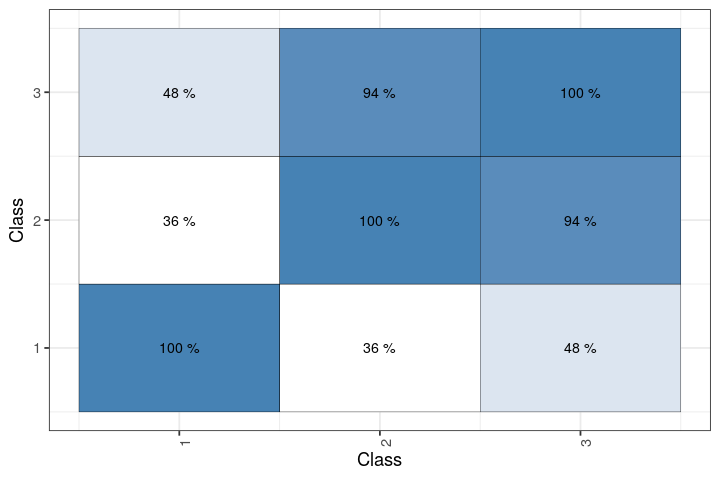

In [67]:
tky<-TukeyHSD(aov( value ~ cl, data=df))
tky.result<-data.frame(tky$cl)
cn <-sort(unique(df$cl))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  geom_text(aes(label=paste(round(value*100,0),"%")),size = 3) +
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

### Ejemplo: Efectividad de una dieta

https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv

Los datos contienen información de 76 personas que tomaron una de las tres dietas (1, 2 o 3). Además se aporta información extra como edad, género y altura. El objetivo del estudio es compara cual de las tres dietas era la mejor para perder peso.

In [68]:
diet = read.csv("data/stcp-Rdataset-Diet.csv",row.names=1)
head(diet)
diet$loss <- diet$pre.weight - diet$weight6weeks
diet$Diet <- factor(diet$Diet)
str(diet)

,gender,Age,Height,pre.weight,Diet,weight6weeks
,<int>,<int>,<int>,<int>,<int>,<dbl>
25,NA,41,171,60,2,60.0
26,NA,32,174,103,2,103.0
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1


'data.frame':	78 obs. of  7 variables:
 $ gender      : int  NA NA 0 0 0 0 0 0 0 0 ...
 $ Age         : int  41 32 22 46 55 33 50 50 37 28 ...
 $ Height      : int  171 174 159 192 170 171 170 201 174 176 ...
 $ pre.weight  : int  60 103 58 60 64 64 65 66 67 69 ...
 $ Diet        : Factor w/ 3 levels "1","2","3": 2 2 1 1 1 1 1 1 1 1 ...
 $ weight6weeks: num  60 103 54.2 54 63.3 61.1 62.2 64 65 60.5 ...
 $ loss        : num  0 0 3.8 6 0.7 ...


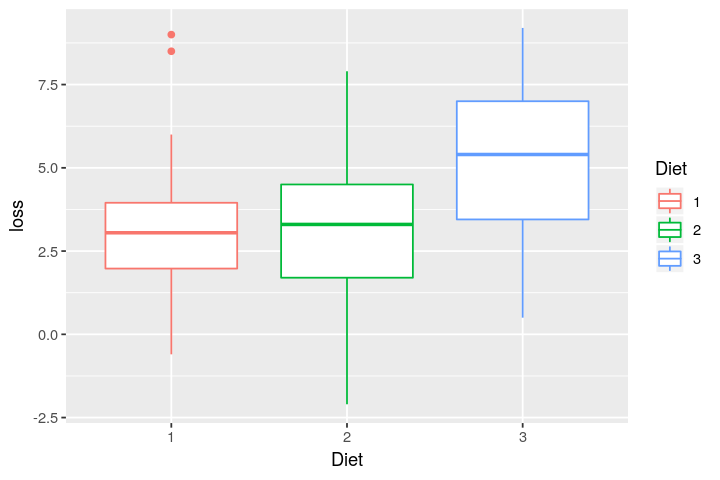

In [69]:
ggplot(diet, aes(y=loss, x=Diet, color=Diet))+geom_boxplot()

Comprobamos que los datos siguen una normal y que las varianzas son iguales con lo cual podemos **aplicar un test ANOVA**.

In [70]:
for (v in levels(diet$Diet)){
    print(paste("Diet:",v,"pvalue,",
                shapiro.test(diet$loss[diet$Diet==v])$p.value))
}

[1] "Diet: 1 pvalue, 0.0774863354064023"
[1] "Diet: 2 pvalue, 0.961174848331039"
[1] "Diet: 3 pvalue, 0.372040025775311"


Aplicamos el test ANOVA y vemos que efectivamente, hay una diferencia estadística significativa entre las diferentes dietas.

In [71]:
anovatest <- aov(loss~Diet, data=diet)
summary(anovatest)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   71.1   35.55   6.197 0.00323 **
Residuals   75  430.2    5.74                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [72]:
tky<-TukeyHSD(anovatest)
tky

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = loss ~ Diet, data = diet)

$Diet
          diff        lwr      upr     p adj
2-1 -0.2740741 -1.8806155 1.332467 0.9124737
3-1  1.8481481  0.2416067 3.454690 0.0201413
3-2  2.1222222  0.5636481 3.680796 0.0047819


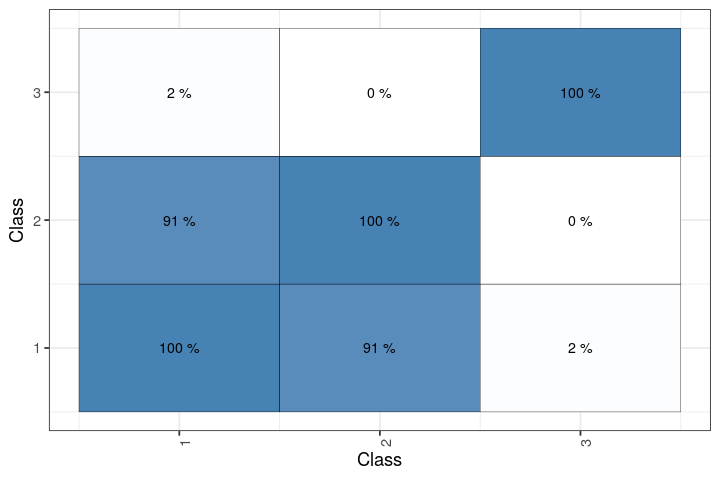

In [73]:
tky.result<-data.frame(tky$Diet)
cn <-sort(unique(diet$Diet))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  geom_text(aes(label=paste(round(value*100,0),"%")),size = 3) +
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

# ANOVA dos grupos

El ANOVA de dos grupos es una extensión del ANOVA de un factor en el que hay dos variables (factores) que interactúan con los datos. En este caso, los datos se dan en forma de matriz donde cada celda tendrá las muestras correspondientes a los dos factores dependientes, uno dado por el número de fila y otro por el número de columna.

La hipótesis nula afirma que todos los grupos tienen la misma media:
\\[
\begin{split}
H_0 &: \beta_1 = \beta_2 = \beta_3 = 0\\
H_1 &: \text{al menos un par }\beta_j\ne \beta_i
\end{split}
\\]
Estas hipótesis examinan si las muestras siguen la siguiente regresión lineal de diferentes grupos: $y_{i}=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i1}x_{i2}+\varepsilon_{i}=\widehat{y_i}+\varepsilon_{i}$, donde:
* $y_{i}$ es la variable dependiente, muestra i-ésima.
* $\beta_0$ es un coeficiente desconocido que tiene que ser estimado, es independiente de todas las variables.
* $\beta_1$ es un coeficiente desconocido que tiene que ser estimado para la primera variable independiente $x_{i1}$.
* $\beta_2$ es un coeficiente desconocido que tiene que ser estimado para la segunda variable independiente $x_{i2}$.
* $\beta_3$ es un coeficiente desconocido que tiene que ser estimado, refleja la interdepencia entre $x_{i1}$ y $x_{i2}$.
* $x_{i1}$ es la primera variable dependiente asociada con la i-ésima muestra.
* $x_{i2}$ es la segunda variable dependiente asociada con la i-ésima muestra.
* $\varepsilon_{ij}$ son los errores resultantes del modelo.
* $\widehat{y_i}$ es la estimación de la i-esima variable.
* $k$ es el número de grupos
* $n$ es el número total de muestras


El test estadítico F es:
\\[
F=\frac{\sum_{j=1}^{n} \left ( \widehat{y_j}-\bar{y} \right )^2 / k }{\sum_{j=1}^{k} \sum_{i=1}^{n_j} \left ( y_{ij}-\widehat{y_j} \right )^2 / \left ( n-k-1 \right ) }
\\]

### Funciones en R

In [74]:
varId1<-c(1,2)
varId2<-seq(0,5,length=4)
var1<-c(rep(varId1,each=50))
var2<-c(rep(varId2,length.out=length(var1)))
var1
var2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

[1] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
  [9] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [17] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [25] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [33] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [41] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [49] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [57] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [65] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [73] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [81] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [89] 0.000000 1.666667 3.333333 5.000000 0.000000 1.666667 3.333333 5.000000
 [97] 0.000000 1.666667 3.333333 5.000000

In [75]:
y<-rnorm(length(var1),mean=0,sd=2)+var1+var2
dfy<-data.frame(y,var1,var2)

summary(aov( y ~ var1*var2, data=dfy))

            Df Sum Sq Mean Sq F value   Pr(>F)    
var1         1   73.9    73.9   19.61 2.51e-05 ***
var2         1  328.2   328.2   87.17 3.96e-15 ***
var1:var2    1    0.0     0.0    0.00    0.984    
Residuals   96  361.5     3.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [81]:
# Ejemplo dieta y género
str(diet)
diet$gender<-factor(diet$gender, labels=c("female","male"))
summary(aov(loss~Diet+gender,data=diet))

'data.frame':	78 obs. of  7 variables:
 $ gender      : Factor w/ 2 levels "female","male": NA NA 1 1 1 1 1 1 1 1 ...
 $ Age         : int  41 32 22 46 55 33 50 50 37 28 ...
 $ Height      : int  171 174 159 192 170 171 170 201 174 176 ...
 $ pre.weight  : int  60 103 58 60 64 64 65 66 67 69 ...
 $ Diet        : Factor w/ 3 levels "1","2","3": 2 2 1 1 1 1 1 1 1 1 ...
 $ weight6weeks: num  60 103 54.2 54 63.3 61.1 62.2 64 65 60.5 ...
 $ loss        : num  0 0 3.8 6 0.7 ...


            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   60.5  30.264   5.312 0.00705 **
gender       1    0.2   0.169   0.030 0.86387   
Residuals   72  410.2   5.698                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

Vemos que afecta más a ciertas dietas en función del género

In [82]:
# Ejemplo lm
summary(lm(loss~Diet+gender,data=diet))


Call:
lm(formula = loss ~ Diet + gender, data = diet)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3262 -1.4018  0.1218  1.6941  5.6445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.26038    0.53890   6.050  5.9e-08 ***
Diet2       -0.03422    0.68226  -0.050  0.96014    
Diet3        1.84551    0.66982   2.755  0.00742 ** 
gendermale   0.09508    0.55258   0.172  0.86387    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.387 on 72 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1289,	Adjusted R-squared:  0.09259 
F-statistic: 3.551 on 3 and 72 DF,  p-value: 0.01855


Podemos ver que la dieta 3 en los hombres no adelgaza tanto como en las mujeres.

In [83]:
lossmale3<-mean(subset(diet,gender=="male" & Diet==3)$loss)
lossfemale3<-mean(subset(diet,gender=="female" & Diet==3)$loss)
lossmale1<-mean(subset(diet,gender=="male" & Diet==1)$loss) 
lossfemale1<-mean(subset(diet,gender=="female" & Diet==1)$loss)

paste("Perdida de peso por dieta 3 en hombres: ",lossmale3)
paste("Perdida de peso por dieta 3 en mujeres: ",lossfemale3)
paste("El coeficiente del modelo se calcula como:",lossmale3-lossfemale3-(lossmale1-lossfemale1))


[1] "Perdida de peso por dieta 3 en hombres:  4.23333333333333"

[1] "Perdida de peso por dieta 3 en mujeres:  5.88"

[1] "El coeficiente del modelo se calcula como: -2.24666666666667"

In [84]:
summary(aov(loss~Diet*gender,data=diet))

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   60.5  30.264   5.629 0.00541 **
gender       1    0.2   0.169   0.031 0.85991   
Diet:gender  2   33.9  16.952   3.153 0.04884 * 
Residuals   70  376.3   5.376                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

In [85]:
summary(lm(loss~Diet*gender,data=diet))


Call:
lm(formula = loss ~ Diet * gender, data = diet)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5091 -1.2958  0.0705  1.2159  5.4500 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.0500     0.6197   4.922 5.49e-06 ***
Diet2             -0.4429     0.8764  -0.505   0.6149    
Diet3              2.8300     0.8616   3.284   0.0016 ** 
gendermale         0.6000     0.9600   0.625   0.5340    
Diet2:gendermale   0.9019     1.3395   0.673   0.5030    
Diet3:gendermale  -2.2467     1.3145  -1.709   0.0919 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.319 on 70 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2009,	Adjusted R-squared:  0.1438 
F-statistic: 3.519 on 5 and 70 DF,  p-value: 0.006775


# Tablas de contingencia

Una tabla de contingencia es una tabla o matriz que muestar la frecuencia de ocurrencia de diferentes variables.

|.|perro|gato|
|-|-|-|
|blanco|10|5|
|negro|4|3|

## Chi cuadrado

El test chi cuadrado de Pearson puede ser usado como un test para validad la **independencia de datos categóricos**. Las hipótesis son:
* La hipótesis nula $H_0$ es que las variables son independientes, no hay asociación estadística.
* La hipótesis alternativa $H_1$ es que hay una relación estadístico o asociación entre variables.

Este test hace las siguientes suposiciones:
* Muestra obtenida por muestreo aleatorio.
* La muestra es lo suficientemente grande.
* El conteo en cada celda también tiene que ser estadísticamente significativo.
* Las muestras se suponen independientes, los datos no pueden estar correlados.

Este test se puede usar para las siguientes comparaciones:
* **Test de homogeneidad** (goodnes: Compara si la distribución de datos es homogenea.
* **Test de independencia**: Compara si observaciones de dos variables son independedientes una de la otra.
* **Test de bondad**: para comparar si una distribución de frecuencias observdada difiere de una teórica.


### Una variable

En esta caso las observaciones consisten en valores de una única variable independiente (ej: un dado).
El valor del test estadístico es:

\\[
\chi^2 = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i} = N \sum_i^n \frac{(O_i/N-p_i)^2}{p_i}
\\]

Donde:
* $N$ es el número total de elementos observados.
* $O_i$ es el número de elementos observados en la categoría *i*.
* $E_i$ es el número de elementos esperados en la categoría *i*.
* $p_i$ es la probabilidad esperada de encontrar un elemento en la categoría *i*. $$p_i=E_i/N$$
* $n$ es el número de categoría en el estudio.

Este estadístico es usado para calcular el p-valor comparando el valor del estadístico con la distribución chi-cuadrado donde el número de grados de libertad será $n-1$.

#### Funciones en R

Por ejemplo, imaginemos que queremos comprobar si un dado de 4 lados es justo, es decir, si no está trucado. Tiramos 40 veces y apuntamos el número de veces. La tabla de frecuencias que aparece es:

|**1**|**2**|**3**|**4**|
|---|---|---|---|
| 10| 7 | 9 | 14|

Comprobar esto sería un **test de homogeneidad**.


In [88]:
observed<-c(10,7,9,14)
#observed<-c(10,7,9,0)

N<-sum(observed)
expected<-N/length(observed)
test<-sum((observed-expected)^2/expected)

pvalue<-1-pchisq(test,length(observed)-1)
print(paste("El pvalor es",pvalue))

[1] "El pvalor es 0.457489546878183"


El p-valor para aceptar la hipótesis nula es muy alto, así que podemos asumir $H_0$ y suponer que el dado probablemente sea justo. La función *chisq.test* de R puede ser usada para este propósito:

In [89]:
cqt <- chisq.test(observed)
cqt


	Chi-squared test for given probabilities

data:  observed
X-squared = 2.6, df = 3, p-value = 0.4575


In [ ]:
d.f.<-cqt$statistic
t<-cqt$parameter
loth<-qchisq(0.05,d.f.,lower.tail = T)


qsd009<-function(x){    
    out<-dchisq(x,d.f.)
    out[x> loth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dchisq(x,d.f.)
    out[ x> t  ]<-NA
    out
}

chdf<-data.frame(z=c(-1,15))

ggplot(chdf,aes(x=z))+stat_function(fun=dchisq,args = list(df = d.f.))+  
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.9)+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=1)+
  geom_vline(xintercept = t,color="blue")+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

### Dos variables

En este caso, una observación consiste en los valores de dos variables. La hipótesis nula es que la ocurrencia de estos valores sea estadísticamente independiente. Cada observación está localizada en una celda de una matriz llamada tabla de contingencia. Si hay $r$ filas y $c$ columnas en la tabla, la frecuencia teórica por cada celda, bajo la hipótesis de independencia es:

\\[
    E_{i,j}=N p_i p_j
\\]
Donde:
* p_i: Es la probabilidad de la fila $i$.
* p_j: Es la probabilidad de la columna $j$.

En este caso el valor del test estadístico es:

\\[
\chi^2 = \sum_i\sum_j \frac{(O_{i,j}-E_{i,j})^2}{E_{i,j}} 
\\]

Y el número de grados de libertad es $$(r-1)(c-1)$$.

#### Funciones en R

Imaginemos que tenemos tres grupos de personas, A, B y C y les preguntamos si les gustan más los gatos o los perros. Obtendríamos la siguietne tabla:

| . |**A**|**B**|**C**|
|---|---|---|---|
|cats | 100| 205 | 95  |
|dogs | 203| 401 | 205 |

Esto sería un **test de independencia** para ver si hay diferencia entre perros y gatos.

In [ ]:
M <- as.table(rbind(c(100, 205, 95), c(203, 400, 205)))
dimnames(M) <- list(animal = c("cats", "dogs"), group = c("A","B", "C"))
M
chisq.test(M)

El elevado p-valor de 0.81 indica que podemos aceptar $H_0$, lo que significa que no hay diferencias en los grupos de personas que le gustan los perros y los gatos.

Si modificamos una celda del grupo **C** y perros, obtenenemos un resultado diferente, en este caso tenemos que rechazar la hipótesis nula $H_0$ y asumir que hay diferencias entre perros y gatos para el siguiene grupo:

|. |**A**|**B**|**C**|
|---|---|---|---|
|cats | 100| 205 | 95  |
|dogs | 203| 401 | 275 |

In [ ]:
M <- as.table(rbind(c(100, 205, 200), c(203, 400, 400)))
M
cqt<- chisq.test(M)
cqt$p.value

In [ ]:
d.f.<-cqt$statistic
t<-cqt$parameter
loth<-qchisq(0.05,d.f.,lower.tail = T)


qsd009<-function(x){    
    out<-dchisq(x,d.f.)
    out[x> loth  ]<-NA
    out
}

qsdtest<-function(x){    
    out<-dchisq(x,d.f.)
    out[ x> t  ]<-NA
    out
}

chdf<-data.frame(z=c(-1,15))

ggplot(chdf,aes(x=z))+stat_function(fun=dchisq,args = list(df = d.f.))+  
  stat_function(fun=qsdtest, geom="area",fill="yellow",alpha=0.9)+
  stat_function(fun=qsd009, geom="area",fill="red",alpha=1)+
  geom_vline(xintercept = t,color="blue")+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

## Comparando distribuciones

Es posible comparar si una distribución discreta sigue o no determinada función de probabilidad conocida. Para ello basta con comprobar como varía en una tabla

En estos casos el valor $E_{i}$ es pasado como parámetro.

\\[
\chi^2 = \sum_i^n \frac{(O_{i}-E_{i})^2}{E_{i}}=  N \sum_i^n \frac{(O_{i}-p_{i})^2}{p_{i}}
\\]

donde el número de grados de libertad es igual al número de columnas posibles menos el número de parámetros estimados:
\\[
d.f=n-p
\\]

In [ ]:
rdata<-rpois(10, lambda = 7)
tdata<-table(rdata)
tdata<-table(factor(rdata, levels = as.character(0:max(rdata))))
tdata<-c(as.numeric(tdata),0)

tdata<-tdata/sum(tdata)

probs<-dpois(0:max(rdata), lambda = mean(rdata))
probs<-c(probs,1-sum(probs))
rbind(primary=tdata,reference=round(probs,4))

chisq.test(x=tdata,  p=probs)

In [ ]:
chisq.test(x=tdata,  p=probs, simulate.p.value=T)

## Corrección de Yates por continuidad

El uso de la distribución chi-cuadrado para interpretar el test estadístico requiere suponer que la probabilidad discreta de frecuencias binomiales observadas en la tabla se puede aproximar mediante la distribución chi-cuadrado continuo. Esta suposición no es del todo correcta e introduce algún error.

Para reducir el error en la aproximación, Frank Yates sugirió una corrección para la continuidad que ajusta la fórmula del test chi-cuadrado. Consiste en restar como **máximo 0.5** de la diferencia entre cada valor **observado** y su  **esperado** en una tabla de contingencia de 2×2. Si la diferencia entre el valor observado y esperado fuera menor de 0.5, el numerador simplemente se iguala a 0, no se resta 0.5.  Esto reduce el valor de chi-cuadrado obtenido y por lo tanto aumenta su valor de p.


\\[
\chi^2 = \sum_i\sum_j \frac{(\mid O_{i,j}-E_{i,j}\mid-min(0.5,\mid O_{i,j}-E_{i,j}\mid))^2}{E_{i,j}}
\\]

En R se activa o desactiva con el parámetro *correct* dentro de la función *chisq.test*

In [ ]:
m <- matrix(c(7, 30, 15,40 ),nrow=2, byrow = F, dimnames = list(c("Star Trek","Star Wars"),c("Mujeres","Hombres")))
m
chisq.test(m)

m <- matrix(c(7, 30, 15,40 ),nrow=2, byrow = F, dimnames = list(c("Star Trek","Star Wars"),c("Mujeres","Hombres")))
m
chisq.test(m,correct = FALSE)

## Fisher

El test exacto de Fisher siempre da el valor exacto del pvalor, a diferencia del test chi cuadrado el cual es solamente una aproximación, además funciona bien con muestras pequeñas. 

Una regla aproximada para decidir si usar la aproximáción del test chi-cuadrado o es necesario aplicar el test de fisher es cuando los valores de alguna de las celdas en una tabla de contingencia es menor de 5 o menor de 10 si solo hay dos columnas.

El test es difícil de calcular a mano, pero fácil de calcular en R con la función *fisher.test*.


In [ ]:
M <- as.table(rbind(c(100, 205, 95), c(203, 401, 275)))
fisher.test(M)

## Ejemplo: Dataset Titanic

El Titanic se hundió en 1912 con la pérdida de la mayoría de sus pasajeros. Se pueden obtener detalles sobre 1309 pasajeros y tripulación a bordo del barco Titanic.
Fuente: [www.statstutor.ac.uk](http://www.statstutor.ac.uk)

Veamos si la nacionalidad del pasaje tiene que ver o no a la hora de saber si sobrevivieron o no:

In [ ]:
tit<-read.csv(file = "data/stcp-dataset-titanic_des.csv")
tit$Residence<-factor(tit$Residence,labels = c("American","British","Other"))
tit$survived<-factor(tit$survived,labels = c("Died","Survived"))
tblres<-table(tit[,c("Residence","survived")])
tblres

In [ ]:
chisq.test(tblres)

In [ ]:
fisher.test(tblres)

Ambos tests nos obligan a rechazar la hipótesis nula: La nacionalidad no influye con la tasa de supervivencia.

Así pues tenemos que concluir que si que existe una diferencia significativa en la probabilidad de sobrevivir dependiendo de la nacionalidad.

# Distribuciones estadísticas

Podemos ver si una variable aleatoria sigue una distribución estadística con los denominados ajustes de bondad (Goodness of fit).

Los pasos para tratar de encontrar una distribución estadísca que encaje son:

1. Observar su distribución en frecuencias, calcular histograma (geom_histogram) o la probabilidad estimada (geom_density)
1. Hacer una suposición sobre que distribución podría encajar. La estimación de los parámetros concretos se hará utilizando *Máxima versoimilitud*
1. Utilizar un test estadístico para comprobar como de buena o mala es la distribución.



In [ ]:
bwt<-read.csv("data/birthweight_reduced.csv")
options(repr.plot.height=4,repr.plot.width=6)

bwtmn<-mean(bwt$Birthweight)
bwtsd<-sd(bwt$Birthweight)

library(ggplot2)
ggplot(data=bwt,aes(x=Birthweight))+
    stat_function(fun=dnorm,args = list(mean = bwtmn, sd=bwtsd), geom="area",color="green",fill="green",alpha=0.1)+
    geom_density(color="red")+
    theme_linedraw()

## Test Chi-cuadrado

Ya vimos antes como utilizar este test para comparar una distribución de poisson. En esta sección veremos como repetir lo mismo para una distribución continua.

El proceso es bastante sencillo simplemente hay que calcular el histograma de la función continua y calcular la probabilidad de que un punto aparezca en una de las barras usando como referencia la variable deseada.

In [ ]:
bwt<-read.csv("data/birthweight_reduced.csv")
bwtmn<-mean(bwt$Birthweight)
bwtsd<-sd(bwt$Birthweight)

bwthist <- hist(bwt$Birthweight,breaks=14, right=FALSE,plot = FALSE)
bwthist

In [ ]:
suppressWarnings(library('zoo'))
breaks<-bwthist$breaks
breaks[1]<- -Inf
breaks[length(breaks)]<- Inf

breaks_cdf <- pnorm(breaks, mean=bwtmn, sd=bwtsd)
ref.probs <- rollapply(data=breaks_cdf, width=2, function(x) x[2]-x[1])
ref.probs

In [ ]:

rbind(test=round(bwthist$density,4),reference=round(ref.probs,4))


In [ ]:
chisq.test(bwthist$density, p=ref.probs)

### Test Kolmogorov-Smirnov

Compara la probabilidad acumulada de una distribución con una de referencia.

La función acumulativa empírica se puede representar como:
\\[
F_{n}(x)={1 \over n}\sum _{i=1}^{n}\left\{{\begin{matrix}1&\mathrm {si} \ y_{i}\leq x,\\0&\text{otro caso} .\end{matrix}}\right.
\\]
El estadístico de Kolmogorov-Smirnov es:
\\[
D_{n}=\sup _{x}|F_{n}(x)-F(x)|
\\]

La función acumulativa de la distribución de Komogorov es:
\\[
{Pr} (K\leq x)=1-2\sum _{k=1}^{\infty }(-1)^{k-1}e^{-2k^{2}x^{2}}={\frac {\sqrt {2\pi }}{x}}\sum _{k=1}^{\infty }e^{-(2k-1)^{2}\pi ^{2}/(8x^{2})}
\\]

In [ ]:
myrnd<-runif(100,min=-5,5)
x<-sort(myrnd)
cdf1<-cumsum(abs(x))/sum(abs(myrnd))
cdf2<-pnorm(x,mean=0,sd=sqrt(100/12))
idx<-which.max(abs(cdf1-cdf2))

ggplot(data=data.frame(x=x,test=cdf1,reference=cdf2),aes(x=x))+
    geom_step(aes(y=cdf1),col="red")+
    geom_line(aes(y=cdf2),col="blue")+
    geom_segment(x=x[idx],y=cdf1[idx],xend=x[idx],yend=cdf2[idx])+
    theme_light()


paste("F estadístico: ",abs(cdf1[idx]-cdf2[idx]))

En R se puede probar con la función *ks.test*

In [ ]:
ks.test(myrnd,"pnorm",0,sqrt(100/12))

También se puede utilizar para comparar entre dos distribuciones cualquiera para comprobar si son iguales o no.

In [ ]:
ks.test(myrnd, rnorm(length(myrnd),0,sqrt(100/12)))

Si volvemos al ejemplo del peso de los bebes, podemos ejecutar este test para ver si sigue una gaussiana o no:

In [ ]:
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=bwt,aes(x=Birthweight))+
    stat_ecdf()+
    stat_function(fun=pnorm,args =  list(mean = bwtmn, sd=bwtsd),col="red")+
    theme_linedraw()+xlab("Peso")+ylab("prob acumulada")+ggtitle("Peso de un bebé al nacer")

In [ ]:
ks.test(bwt$Birthweight,"pnorm",bwtmn,bwtsd)

El K-S test de R se queja de que hay datos duplicados. Algo que no debería ocurrir cuando tenemos datos que siguen una distribución realmente aleatoria.

Tampoco se aconseja calcular los parámetros estadísticos como media y varianza de las muestras en si.

Como alternativa se puede usar wilcox.test() o chisq.test(). También existe una alternativa y es usar el paquete KScorrect que aplica una corrección al test K-S para poder utilizar los parámetros estadísticos obtenidos de la muestra.

In [ ]:
# Para instalar el siguiente paquete en la máquina virtual de Vagrant descomentar las siguientes lineas:
#
#dir.create(file.path("/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2"),recursive = T)
#install.packages(c('KScorrect'), lib="~/R/x86_64-pc-linux-gnu-library/3.2", repos='https://cran.rstudio.com/',verbose=F)
library("KScorrect",lib.loc = "/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2")
lc<-LcKS(bwt$Birthweight, cdf="plnorm")
lc$p.value

## Máxima verosimilitud (MLE)

La Máxima verosimilitud (Maximum likelihood estimation) es un método para estimar los parámetros de un modelo estadístico dadas ciertas observaciones del modelo.

### Ejemplo

Imagínate que tienes una báscula defectuosa. Y la utilizas para medir el peso de un bebe niña recién nacido.
Te salen 3 medidas: 3kg, 3.2kg y 5.1kg.

¿Cual es la media?

Si suponemos que la media son 4kg y la desviación típica 1kg tendríamos la siguiente gráfica, ¿cual sería la probabilidad de obtener esas medidas?

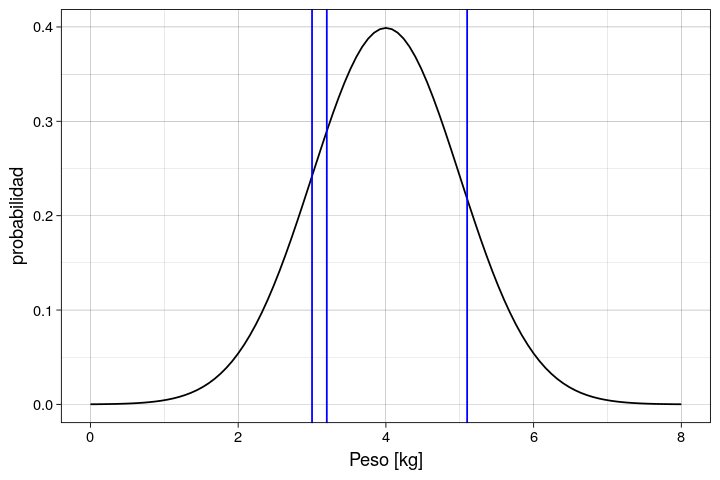

In [90]:
weights<-c(3,3.2,5.1)

options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(0,8))
ggplot(xdf,aes(x=z))+stat_function(fun=dnorm,args = list(mean = 4, sd =1))+
  geom_vline(xintercept = weights[1],color="blue")+
  geom_vline(xintercept = weights[2],color="blue")+
  geom_vline(xintercept = weights[3],color="blue")+
  ylab("probabilidad")+xlab("Peso [kg]")+
  theme_linedraw()


La probabilidad a posteriori condicionada a una gaussiana de media $\mu=4$ y desviación típida $\sigma=1$ se calcula como:
\\[
\begin{split}
    P(X \mid \theta) &= P(X \mid \mu,\sigma)  = \prod_{i=1}^N P(x_i \mid \mu,\sigma) \\ 
    P(X \mid \mu,\sigma) &= \prod_{i=1}^N \frac {1}{\sqrt {2\pi \sigma ^{2}}}\;e^{-{\frac {(x_i-\mu )^{2}}{2\sigma ^{2}}}}
\end{split}
\\]


In [91]:
mnkg=4
sdkg=1
prob<-dnorm(weights[1],mean=mnkg,sd=sdkg)*
      dnorm(weights[2],mean=mnkg,sd=sdkg)*
      dnorm(weights[3],mean=mnkg,sd=sdkg)
paste0("La probabilidad es: P(X|",mnkg,",",sdkg,")=",round(prob,5))

[1] "La probabilidad es: P(X|4,1)=0.01527"

¿Qué ocurriría si tuvieramos una gaussiana de media 3.6? ¿cual sería la probabilidad?

In [92]:
mnkg=3.6
sdkg=1
prob<-dnorm(weights[1],mean=mnkg,sd=sdkg)*
      dnorm(weights[2],mean=mnkg,sd=sdkg)*
      dnorm(weights[3],mean=mnkg,sd=sdkg)
paste0("La probabilidad es: P(X|",mnkg,",",sdkg,")=",round(prob,5))

[1] "La probabilidad es: P(X|3.6,1)=0.01589"

¿Cual es el valor óptimo de $\theta=\{\mu,\sigma\}$ que maximiza la probabilidad?

La probabilidad para el vector $X$ de $n$ observaciones viene dada por:
\\[
\mathcal {L}(\theta)=P(X_1=x_1,X_2=x_2,\ldots,X_n=x_n)=f(x_1;\theta)\cdot f(x_2;\theta)\cdots f(x_n;\theta)=\prod\limits_{i=1}^n f(x_i;\theta)
\\]

Es el estimador de máxima verosimilitud, que se calcula como: 
\\[
\hat {\theta }\in \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }}\ {\mathcal {L}}(\theta \,;x)\}
\\]

Maximizar $\mathcal {L}$ equivale a maximizar su logaritmo. Muchas veces es mejor trabajar con logaritmos, sobretodo con funciones de probabilidad basadas en exponenciales:
\\[
{\displaystyle \ell (\theta \,;x)=\ln {\mathcal {L}}(\theta \,;x),}
\\]

Su máximo se puede obtener derivando respecto a $\theta$ e igualando a cero:

\\[
 \frac {\partial }{\partial \theta }\ln {\Big (}{\mathcal {L}}(\theta ){\Big )}=0
\\]

#### Ejemplo MLE de gaussiana:

La función de distribución es:
\\[
f(x\mid \mu ,\sigma )={\frac {1}{{\sqrt {2\pi \sigma ^{2}}}\ }}\exp {\left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)},
\\]

La probabilidad de de tener una muestra de $n$ muestras independientes identicamente distribuidas de forma aleatoria es: 
\\[
\mathcal {L}(\theta)=\mathcal {L}(\mu ,\sigma ) =f(x_{1},\ldots ,x_{n}\mid \mu ,\sigma ^{2})=\prod _{i=1}^{n}f(x_{i}\mid \mu ,\sigma ^{2})=\left({\frac {1}{2\pi \sigma ^{2}}}\right)^{n/2}\exp \left(-{\frac {\sum _{i=1}^{n}(x_{i}-\mu )^{2}}{2\sigma ^{2}}}\right),
\\]

Para simplificar pasamos a logaritmos:
\\[
\ln {\Big (}{\mathcal {L}}(\mu ,\sigma ){\Big )}=-{\frac {\,n\,}{2}}\ln(2\pi \sigma ^{2})-{\frac {1}{2\sigma ^{2}}}\sum _{i=1}^{n}(\,x_{i}-\mu \,)^{2}
\\]

Calculamos el estimador de máxima verosimilitud para la media:
\\[
{\begin{aligned}0&={\frac {\partial }{\partial \mu }}\log {\Big (}{\mathcal {L}}(\mu ,\sigma ){\Big )}=0-{\frac {\;-2\!n({\bar {x}}-\mu )\;}{2\sigma ^{2}}}.\end{aligned}}
\\]
El resultado es:
\\[
{\hat {\mu }}={\bar {x}}=\sum _{i=1}^{n}{\frac {\,x_{i}\,}{n}}
\\]
Si repetimos el proceso para la desviación típica obtendríamos:
\\[
\widehat {\sigma }^{2}={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}
\\]
**AVISO**: El MLE no nos devuelve el estimador sesgado de la varianza porque $\mu \neq \hat {\mu }$. Si en la equación de $\widehat {\sigma }^{2}$ metemos la de $\hat {\mu }$. Obtenemos:
\\[
\operatorname {E} {\big [}\;{\widehat {\sigma }}^{2}\;{\big ]}={\frac {\,n-1\,}{n}}\sigma ^{2}.
\\]

In [93]:
weights

[1] 3.0 3.2 5.1

In [94]:
sapply(weights,function(xi) dnorm(xi,mean=mnkg,sd=sdkg))

[1] 0.3332246 0.3682701 0.1295176

In [95]:
mnkg=3.6
sdkg=1

l<-function(theta){
    mnkg=theta[1]
    sdkg=theta[2]
    -prod(sapply(weights,function(xi) dnorm(xi,mean=mnkg,sd=sdkg)))
}
                
o<-optim(c(5,1), l)
                
paste("La media óptima calculada mediante MLE es:",o$par[1])
paste("La media estimada es:",mean(weights))
                 
paste("La desviación típica óptima calculada mediante MLE es:",o$par[2])
paste("La desviación típica estimada es:",sd(weights))                 
o                 

[1] "La media óptima calculada mediante MLE es: 3.76665490664192"

[1] "La media estimada es: 3.76666666666667"

[1] "La desviación típica óptima calculada mediante MLE es: 0.946337285299585"

[1] "La desviación típica estimada es: 1.15902257671425"

$par
[1] 3.7666549 0.9463373

$value
[1] -0.01671667

$counts
function gradient 
      81       NA 

$convergence
[1] 0

$message
NULL


#### Ejemplo MLE de bernoulli:

La formula de la distribución de probabilidad de una Bernuilli es:
\\[
f(k;p)=p^k(1-p)^{1-k}
\\]

La probabilidad de de tener una muestra de $n$ muestras independientes identicamente distribuidas de forma aleatoria es: 
\\[
\mathcal {L}(\theta)=\mathcal {L}(p ) =f(x_{1},\ldots ,x_{n}\mid \mu ,\sigma ^{2})=\prod _{i=1}^{n}f(x_{i}\mid \mu ,\sigma ^{2})=p^{\sum x_i} (1-p)^{n-\sum x_i}
\\]

Para simplificar pasamos a logaritmos:
\\[
\ln {\Big (}{\mathcal {L}}(p ){\Big )}=\Big(\sum x_i\Big)\ln(p)+\Big(n-\sum x_i\Big)\ln(1-p)
\\]

Calculamos el estimador de máxima verosimilitud para calcular $p$:
\\[
0={\frac {\partial }{\partial p }}\log {\Big (}{\mathcal {L}}(p ){\Big )}=\frac{\Big(\sum x_i\Big)}{p}+\frac{\Big(n-\sum x_i\Big)}{(1-p)}
\\]
El resultado es:
\\[
{\hat {p }}=\sum _{i=1}^{n}{\frac {\,x_{i}\,}{n}}
\\]

In [ ]:
X<-rbinom(50,size=1,p=0.3)

l<-function(p){
    -prod(sapply(X,function(xi) p^xi*(1-p)^(1-xi)))
}
                
o<-optimize(l,c(0,1))
                
paste("La media óptima calculada mediante MLE es:",o$minimum)
paste("La media estimada es:",mean(X))
                 
o

### Maximum a Posteriori (MAP)

Imaginemos que tenemos información adicional, como por ejemplo la siguiente tabla de la [OMS](http://www.who.int/childgrowth/standards/sft_wfa_girls_p/en/):
![](pics/percentiles.png)
Ahí vemos que la media de las niñas al nacer es de 3.2kg.

¿Cómo podemos saber la varianza?


In [96]:
calcVar<-function(x,p,weight){
    #(qnorm(0.97,mean=3.2,sd=x)-4.2)^2
    (qnorm(p,mean=3.2,sd=x)-weight)^2
}
o<-optimize(calcVar,c(0,2),p=0.97,weight=4.2)
paste("La desviación típica calculada con el percentil 97 es:",o$minimum)

o<-optimize(calcVar,c(0,2),p=0.85,weight=3.7)
paste("La desviación típica calculada con el percentil 85 es:",o$minimum)

o<-optimize(calcVar,c(0,2),p=0.15,weight=2.8)
paste("La desviación típica calculada con el percentil 15 es:",o$minimum)

o<-optimize(calcVar,c(0,2),p=0.03,weight=2.4)
paste("La desviación típica calculada con el percentil 3 es:",o$minimum)

[1] "La desviación típica calculada con el percentil 97 es: 0.531690450066428"

[1] "La desviación típica calculada con el percentil 85 es: 0.48242367051124"

[1] "La desviación típica calculada con el percentil 15 es: 0.385938936408992"

[1] "La desviación típica calculada con el percentil 3 es: 0.425352360053143"

Para redondear, supongamos que el conocimiento que tenemos a priori es que los niños al nacer tienen una media de 3.2kg y una desviación típica de 0.5.

Acorde con Bayes, si tenemos información previa (el prior) podemos calcular la probabilidad a posteriori como:
\\[
P(\theta|X)=\frac{P(X|\theta)·P_{apriori}(\theta)}{P(X)}
\\]

Donde $X$ son los datos que tenemos y $\theta$ son los parámetros que estimamos.

Dados los pesos que hemos medido, 
¿cual es la probabilidad de que sigan una gaussiana de media 3.2 y desviación 0.5?

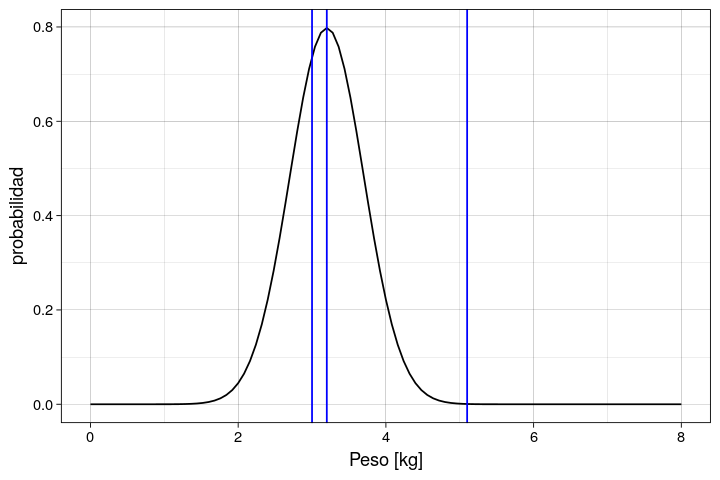

In [97]:
options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(0,8))
ggplot(xdf,aes(x=z))+stat_function(fun=dnorm,args = list(mean = 3.2, sd =0.5))+
  geom_vline(xintercept = weights[1],color="blue")+
  geom_vline(xintercept = weights[2],color="blue")+
  geom_vline(xintercept = weights[3],color="blue")+
  ylab("probabilidad")+xlab("Peso [kg]")+
  theme_linedraw()

In [98]:
for (w in weights){
    print(paste("La probabilidad de que pese",w,"es",dnorm(w,mean=3.2,sd=0.5)))
}

[1] "La probabilidad de que pese 3 es 0.736540280606647"
[1] "La probabilidad de que pese 3.2 es 0.797884560802865"
[1] "La probabilidad de que pese 5.1 es 0.000583893851582923"


Como vemos, la probabilidad de haber realizado una medida de 6kg es bastante baja. Es posible que se trate de un outlayer, un valor atípico, producto de un error en la medida.

Si seguimos adelante con el teorema de Bayes, lo que nos interesa es obtener el máximo a posteriori, maximizar $P(\theta|X)$

\\[
\hat {\theta }\in \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }} P(\theta|X)\} =\hat {\theta }\in \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }} \frac{P(X|\theta)·P_{apriori}(\theta)}{P(X)}\}
\\]

Lo cual equivale a:
\\[
\hat {\theta }\in \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }} P(\theta|X) \}=\{ {\operatorname {arg\,max} }P(X|\theta)·P_{apriori}(\theta)\}
\\]

In [99]:
newl<-function(theta){
    mnkg=theta[1]
    sdkg=theta[2]
    mnkg_apriori=3.2
    sdkg_apriori=0.5
    -prod(sapply(weights,function(xi) (dnorm(xi,mean=mnkg,sd=sdkg)*
                                       dnorm(mnkg,mean=mnkg_apriori,sd=sdkg_apriori))))
}                
                 
o<-optim(c(5,1), newl)

paste("La media óptima calculada mediante MAP es:",o$par[1])
paste("La media estimada es:",mean(weights))
                 
paste("La desviación típica óptima calculada mediante MAP es:",o$par[2])
paste("La desviación típica estimada es:",sd(weights))       

[1] "La media óptima calculada mediante MAP es: 3.30421100283403"

[1] "La media estimada es: 3.76666666666667"

[1] "La desviación típica óptima calculada mediante MAP es: 1.05329037379737"

[1] "La desviación típica estimada es: 1.15902257671425"

Como vemos, el MAP no se ve muy afectado por nuestro dato atípico de 6kg.

#### Bayesianos vs Frecuentistas

De obligada referencia: https://xkcd.com/1132/

El MLE es igual al MAP cuando el prior es completamente desconocido, es decir, cuando es una uniforme.

Características de aproximación Bayesiana:
* La mayor parte de las veces sabemos como debería ser nuestra distribución.
* Elegir mal el Prior puede tener consecuencias catastróficas.
* Podemos obtener mejores resultados con menos muestras.

Características de aproximación Frecuentista:
* No necesitamos hacer ninguna suposición de los datos con lo que podemos evitar sesgos basados en prejuicios.

# Test A/B

Es un nombre utilizado realizar tests controlados con dos variantes A y B. Se puede utilizar por ejemplo para ver el cambio que se produce en una en una web.

### Ejemplo test A/B

Tenemos una web de compras. Sabemos que aproximadamente un 1% de los clientes que entran en la web acaban comprando algo. 

Queremos mejorar esto diseñando una nueva web y observando diferentes patrones en los usuarios que acceden.

¿Que web es mejor la nueva o la original?

In [100]:

set.seed(6)

generateABdata<-function(N){
    group<-factor(rbinom(N,size=1,p=0.5),label=c("Control","New"))
    timespend<-rgamma(N,scale = 0.05,shape = 200)
    timespend[group=="New"]<-rgamma(sum(group=="New"),scale = 0.1,shape = 110)
    #timespend[group=="New"]<-rnorm(sum(group=="New"),mean = 12,sd = 5)

    buy<-rbinom(N,size=1,p=0.01)
    buy[group=="New"]<-rbinom(sum(group=="New"),size=1,p=0.015)    
    buy<-factor(buy,label=c("NO","YES"))    
    #timespend[buy=="YES" & group=="New"]<-rgamma(sum(buy=="YES" & group=="New"),scale = 0.1,shape = 100)
    timespend[buy=="YES" & group=="New"]<-rnorm(sum(buy=="YES" & group=="New"),mean = 9,sd = 2)

    data.frame(user_id=factor(1000+1:N),group,timespend,buy)
}

myweb<-generateABdata(1000)

summary(myweb)

    user_id        group       timespend       buy     
 1001   :  1   Control:503   Min.   : 7.482   NO :987  
 1002   :  1   New    :497   1st Qu.: 9.797   YES: 13  
 1003   :  1                 Median :10.382            
 1004   :  1                 Mean   :10.505            
 1005   :  1                 3rd Qu.:11.134            
 1006   :  1                 Max.   :15.215            
 (Other):994                                           

Primero comprobamos si el tiempo gastado en la página ha cambiado o no respecto a si la web es de control o es la nueva versión.

In [101]:
paste("Los datos del grupo de control se parecen a una gaussiana. p-valor:",
      shapiro.test(myweb$timespend[myweb$group=="Control"])$p.value)
paste("Los datos del grupo nuevo se parecen a una gaussiana. p-valor:",
      shapiro.test(myweb$timespend[myweb$group=="New"])$p.value)


t.test(x=myweb$timespend[myweb$group=="Control"],y=myweb$timespend[myweb$group=="New"])

[1] "Los datos del grupo de control se parecen a una gaussiana. p-valor: 0.164567845778128"

[1] "Los datos del grupo nuevo se parecen a una gaussiana. p-valor: 0.140428850207684"


	Welch Two Sample t-test

data:  myweb$timespend[myweb$group == "Control"] and myweb$timespend[myweb$group == "New"]
t = -17.055, df = 835.13, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1116422 -0.8821849
sample estimates:
mean of x mean of y 
 10.01001  11.00693 


Parece que los usuarios pasan de media 11 minutos en la página nueva, mientras que en la de control pasan unos 10 minutos.

Veamos si el tiempo medio que pasa un usuario en la web se ve afectado si compra o no:

In [102]:
buy_users<-subset(myweb,buy=="YES")
with(buy_users,t.test(x=timespend[group=="Control"],y=timespend[group=="New"]))


	Welch Two Sample t-test

data:  timespend[group == "Control"] and timespend[group == "New"]
t = 0.8431, df = 8.3703, p-value = 0.4226
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7752191  1.6796718
sample estimates:
mean of x mean of y 
 9.685438  9.233212 


Parece que los usuarios que compran gastan una media de 9.2 minutos en la **nueva** web, mientras que gastan 9.68 en la **vieja**. Aunque el t-test nos dice que no hay evidencia estadística suficiente para asegurar que las dos medias realmente sean diferentes.

Veamos que ocurre ahora con las compras, si han aumentado o no:

In [103]:
s0<-sum(myweb$buy[myweb$group=="Control"]=="YES")
t0<-sum(myweb$group=="Control")
s1<-sum(myweb$buy[myweb$group=="New"]=="YES")
t1<-sum(myweb$group=="New")

m<-matrix(c(s0,s1,t1,t0),nrow = 2,dimnames=list(c("control","nueva"),c("compras","visitas")))
m

r1<-round(binom.test(m[1,1],m[1,2])$conf.int,4)
r2<-round(binom.test(m[2,1],m[2,2])$conf.int,4)
paste0("El ratio de compras en la web de control es:",round(m[1,1]/m[1,2],4),
       " con un intervalo de confianza: [",r1[1],",",r1[2],"]")
paste0("El ratio de compras en la web nueva es:",round(m[2,1]/m[2,2],4),
       " con un intervalo de confianza: [",r2[1],",",r2[2],"]")

,compras,visitas
control,5,497
nueva,8,503


[1] "El ratio de compras en la web de control es:0.0101 con un intervalo de confianza: [0.0033,0.0233]"

[1] "El ratio de compras en la web nueva es:0.0159 con un intervalo de confianza: [0.0069,0.0311]"

In [104]:
chisq.test(m)
fisher.test(m)


	Pearson's Chi-squared test with Yates' continuity correction

data:  m
X-squared = 0.27675, df = 1, p-value = 0.5988



	Fisher's Exact Test for Count Data

data:  m
p-value = 0.5788
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.1617307 2.2114682
sample estimates:
odds ratio 
 0.6328299 


Tanto el test de fisher como el chi-cuadrado nos indican que no hay muestras sufientes para descartar la hipótesis nula. No podemos decir que la nueva web haya mejorado el ratio de clicks.

Si recogemos más datos:

In [105]:
myweb2<-generateABdata(4000)

In [106]:
buy_users<-subset(myweb2,buy=="YES")
with(buy_users,t.test(x=timespend[group=="Control"],y=timespend[group=="New"]))


	Welch Two Sample t-test

data:  timespend[group == "Control"] and timespend[group == "New"]
t = 3.6855, df = 54.813, p-value = 0.0005245
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5884434 1.9913608
sample estimates:
mean of x mean of y 
10.208018  8.918115 


Si somos capaces de ver que los usuarios que compran en la web nueva estan **menos tiempo**, eso puede indicar que es más fácil comprar.

In [107]:
s0<-sum(myweb2$buy[myweb2$group=="Control"]=="YES")
t0<-sum(myweb2$group=="Control")
s1<-sum(myweb2$buy[myweb2$group=="New"]=="YES")
t1<-sum(myweb2$group=="New")

m<-matrix(c(s0,s1,t1,t0),nrow = 2,dimnames=list(c("control","nueva"),c("compras","visitas")))
m

r1<-round(binom.test(m[1,1],m[1,2])$conf.int,4)
r2<-round(binom.test(m[2,1],m[2,2])$conf.int,4)
paste0("El ratio de compras en la web de control es:",round(m[1,1]/m[1,2],4),
       " con un intervalo de confianza: [",r1[1],",",r1[2],"]")
paste0("El ratio de compras en la web nueva es:",round(m[2,1]/m[2,2],4),
       " con un intervalo de confianza: [",r2[1],",",r2[2],"]")

,compras,visitas
control,15,2000
nueva,42,2000


[1] "El ratio de compras en la web de control es:0.0075 con un intervalo de confianza: [0.0042,0.0123]"

[1] "El ratio de compras en la web nueva es:0.021 con un intervalo de confianza: [0.0152,0.0283]"

Los ratio son más pequeños y apenas se solapan, parece que la web nueva mejora el ratio de compras. Algo que podemos comprobar con el test chi-cuadrado.

In [108]:
chisq.test(m)
fisher.test(m)


	Pearson's Chi-squared test with Yates' continuity correction

data:  m
X-squared = 11.681, df = 1, p-value = 0.0006315



	Fisher's Exact Test for Count Data

data:  m
p-value = 0.000427
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.1834235 0.6600674
sample estimates:
odds ratio 
  0.357211 


# Test A/B con Bayes

Recordemos el teorema de Bayes
\\[
P(\theta|X)=\frac{P(X|\theta)·P_{apriori}(\theta)}{P(X)}
\\]

Donde $X$ son los datos que tenemos y $\theta$ son los parámetros que estimamos.


En el caso de test A/B donde tratamos de ver la tasa de conversión (conversion rate) de dos grupos uno A y otro B.  Como estamos mirando si hay o no conversión esto se traduce en una distribución de Bernoulli. 
La distribución que tenemos es:
\\[
P(X|\theta)=\theta^{X=1}·(1-\theta)^{1-X=1}
\\]
Donde $\theta$ es el ratio de usuarios que se han convertido (que han comprado un producto) vs el total de usuarios: $\theta=\frac{n_s}{n_t}$.


Al tener una función de distribución $P(X|\theta)$, el prior, $P_{apriori}(\theta)$ ha de ser una función Beta, para que $P(\theta|X)$ también sea una función Beta y se cumple la siguiente propiedad:
\\[
Beta(\alpha,\beta) · Bernoulli \left(\theta=\frac{a}{a+b}\right) = Beta(\alpha + a,\beta+b)
\\]


Recordemos que en una función Beta los estimadoes son:

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu= \frac{\alpha}{\alpha + \beta} \qquad
\sigma^2= \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
\\]
La moda sería:
\\[
moda = \frac{\alpha-1}{\alpha + \beta -2}
\\]

Datos sacados de:
https://www.gamasutra.com/blogs/ViktorGregor/20181105/328404/Its_time_to_rethink_AB_testing.php#comments

## Ejemplo

In [109]:
na_t <- 1000
na_s <- 197
nb_t <- 1000
nb_s <- 230
m <- matrix(c(na_s,na_t,nb_s,nb_t), byrow = T,nrow = 2,
            dimnames=list(c("control","nuevo"),c("exitos","intentos")))
m

,exitos,intentos
control,197,1000
nuevo,230,1000


## Versión frecuentista

Porcentaje de la media de conversión de cada grupo:

In [110]:
pa_margin <- round(binom.test(na_s,na_t)$conf.int,3)
pb_margin <- round(binom.test(nb_s,nb_t)$conf.int,3)

matrix(c(pa_margin,pb_margin)*100,nrow=2,dimnames=list(c("control","nuevo"),c("5%","95%")))


,5%,95%
control,17.3,20.4
nuevo,22.3,25.7


Margen de confianza del del 95%:

In [111]:
chisq.test(m)


	Pearson's Chi-squared test with Yates' continuity correction

data:  m
X-squared = 1.9503, df = 1, p-value = 0.1626


In [112]:
fisher.test(m)


	Fisher's Exact Test for Count Data

data:  m
p-value = 0.1503
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6905252 1.0618479
sample estimates:
odds ratio 
 0.8565778 


## Versión Bayesiana

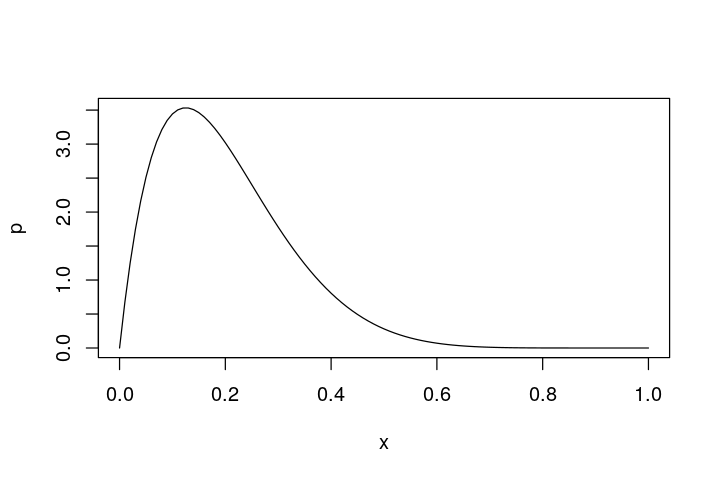

In [113]:
prior_a <- 2
prior_b <- 8

x <- seq(0,1,by=0.01)
p <- dbeta(x,prior_a,prior_b)
plot(x, p,t="l")

In [114]:
#La media sería
sum(x*p)*(x[2]-x[1])

[1] 0.2

Warning message:
“Removed 320 rows containing missing values (geom_path).”

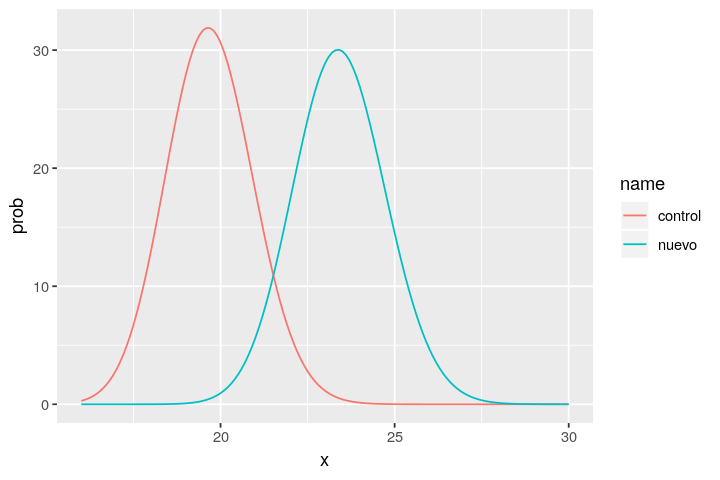

In [115]:
x <- seq(0,0.3, by = 0.001)

p1 <- dbeta(x,prior_a+na_s,prior_b+(na_t-na_s))
p2 <- dbeta(x,prior_b+nb_s,prior_b+(nb_t-nb_s))

df<-data.frame(x=x*100,prob=c(p1,p2),name=c(rep("control",length(x)),rep("nuevo",length(x))))
ggplot(data=df,aes(x=x,y=prob,color=name))+geom_line()+xlim(16,30)

Porcentaje de la media de conversión de cada grupo:

In [116]:
cr_a <- sum(x*p1)*(x[2]-x[1])
cr_b <- sum(x*p2)*(x[2]-x[1])          
matrix(c(cr_a,cr_b)*100,nrow=1,dimnames=list(c("conversión"),c("control","nuevo")))

,control,nuevo
conversión,19.70297,23.42516


Margen de confianza del del 95%:

In [117]:
pa_margin <- qbeta(c(0.025,0.0975),prior_a+na_s,prior_b+(na_t-na_s))
pb_margin <- qbeta(c(0.025,0.0975),prior_b+nb_s,prior_b+(nb_t-nb_s))

matrix(c(pa_margin,pb_margin)*100,nrow=2,dimnames=list(c("control","nuevo"),c("5%","95%")) )

,5%,95%
control,17.30898,20.87265
nuevo,18.09545,21.71580


Vamos a simular por montercarlo la diferencia entre los dos grupos:

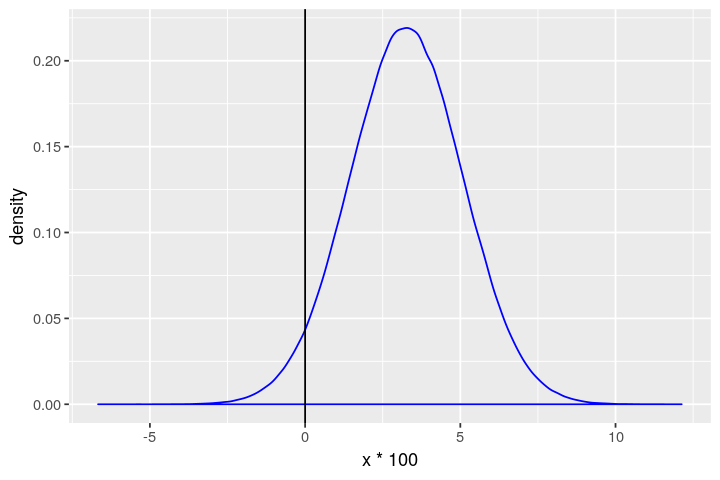

In [118]:
N <- 1000000
r1 <- rbeta(N,prior_a+na_s,prior_b+(na_t-na_s))
r2 <- rbeta(N,prior_a+nb_s,prior_b+(nb_t-nb_s))
diff_df<-data.frame(x=(r2-r1))
ggplot(data=diff_df,aes(x*100))+geom_density(color="blue")+geom_vline(xintercept =0)

La probabilidad de que mejore la **nueva** web es de:

In [119]:
round(sum(diff_df$x>0)/nrow(diff_df),3)*100

[1] 96.4

La mejora esperada si la *nueva* es realmente mejor

In [120]:
mean(diff_df$x[diff_df$x>0])*100

[1] 3.416695

La empeora esperada si la **nueva** es realmente peor es

In [121]:
mean(diff_df$x[diff_df$x<=0])*100

[1] -0.7288301